**Grupo**
* Vitor Rodrigues Ferreira de Sá 420114720 
* Allan Souza 412102279
* Isabela Nascimento Duarte 418105094
* Isaac Pereira Cavalcante dos Santos  418107474
* Kenji Tanizaki 918209343
* Fábio Silva Carneiro 418202517
* Kenzo TANIZAKI 918209494
* André da Silva Francisco 319105260

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import seaborn as sn

pd.options.mode.chained_assignment = None

In [ ]:
uri = "/content/ocorrencias_cenipa.csv"
df_dados = pd.read_csv(uri, sep=';', encoding='latin-1')

df_dados

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,79117,ACIDENTE,INDETERMINADO,ASSIS BRASIL,AC,23/10/2019,2019,15:00:00,SIM,FINALIZADA,1,NÃO,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,BRASIL,INDETERMINADO,DESTRUÍDA
5238,79119,ACIDENTE,INDETERMINADO,SÃO JOSÉ DO RIO CLARO,MT,11/10/2019,2019,10:00:00,SIM,FINALIZADA,1,NÃO,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,BRASIL,INDETERMINADO,DESTRUÍDA
5239,79123,ACIDENTE,INDETERMINADO,ANTONINA,PR,21/09/2019,2019,18:30:00,SIM,FINALIZADA,1,NÃO,TRIKE,INDETERMINADO,INDETERMINADO,SEM TRAÇÃO,0,0,BRASIL,DECOLAGEM,SUBSTANCIAL
5240,79203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FLORIANÓPOLIS,SC,20/12/2019,2019,16:37:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,2,1980,BRASIL,CORRIDA APÓS POUSO,LEVE


# Análise **Geral**

In [ ]:
type(df_dados)

pandas.core.frame.DataFrame

In [ ]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo                     5242 non-null   int64 
 1   tipo                       5242 non-null   object
 2   descricao                  5242 non-null   object
 3   cidade                     5242 non-null   object
 4   estado                     5242 non-null   object
 5   data                       5242 non-null   object
 6   ano                        5242 non-null   int64 
 7   hora                       5242 non-null   object
 8   aeronave_liberada          5242 non-null   object
 9   status_investigacao        5242 non-null   object
 10  aeronaves_envolvidas       5242 non-null   int64 
 11  ocorrencia_saida_pista     5242 non-null   object
 12  aeronave_tipo              5242 non-null   object
 13  aeronave_fabricante        5242 non-null   object
 14  motor_ti

In [ ]:
df_dados.shape

(5242, 21)

In [ ]:
df_dados.columns

Index(['codigo', 'tipo', 'descricao', 'cidade', 'estado', 'data', 'ano',
       'hora', 'aeronave_liberada', 'status_investigacao',
       'aeronaves_envolvidas', 'ocorrencia_saida_pista', 'aeronave_tipo',
       'aeronave_fabricante', 'motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_pais_fabricante', 'aeronave_fase_operacao',
       'aeronave_nivel_dano'],
      dtype='object')

In [ ]:
df_dados.describe()

,codigo,ano,aeronaves_envolvidas,aeronave_assentos,aeronave_ano_fabricacao
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,56472.458985,2014.180847,1.011828,27.575353,1863.320870
std,13045.616926,2.849750,0.111593,54.528085,507.051481
min,39115.000000,2010.000000,1.000000,0.000000,0.000000
25%,46024.500000,2012.000000,1.000000,2.000000,1978.000000
50%,51693.500000,2014.000000,1.000000,6.000000,1992.000000
75%,66450.750000,2017.000000,1.000000,10.000000,2007.000000
max,79227.000000,2019.000000,3.000000,384.000000,9999.000000


In [ ]:
df_dados.tail()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
5237,79117,ACIDENTE,INDETERMINADO,ASSIS BRASIL,AC,23/10/2019,2019,15:00:00,SIM,FINALIZADA,1,NÃO,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,BRASIL,INDETERMINADO,DESTRUÍDA
5238,79119,ACIDENTE,INDETERMINADO,SÃO JOSÉ DO RIO CLARO,MT,11/10/2019,2019,10:00:00,SIM,FINALIZADA,1,NÃO,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,BRASIL,INDETERMINADO,DESTRUÍDA
5239,79123,ACIDENTE,INDETERMINADO,ANTONINA,PR,21/09/2019,2019,18:30:00,SIM,FINALIZADA,1,NÃO,TRIKE,INDETERMINADO,INDETERMINADO,SEM TRAÇÃO,0,0,BRASIL,DECOLAGEM,SUBSTANCIAL
5240,79203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FLORIANÓPOLIS,SC,20/12/2019,2019,16:37:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,2,1980,BRASIL,CORRIDA APÓS POUSO,LEVE
5241,79227,ACIDENTE,OUTROS,NOVO PROGRESSO,PA,20/01/2017,2017,16:24:00,SIM,FINALIZADA,1,NÃO,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,8,1974,BRASIL,POUSO,SUBSTANCIAL


In [ ]:
df_dados.sample(5)

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
190,41374,ACIDENTE,PERDA DE CONTROLE EM VOO,CORRENTINA,BA,26/05/2010,2010,14:00:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,1,1980,BRASIL,OUTRA FASE,DESTRUÍDA
344,42614,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,NAVEGANTES,SC,21/07/2010,2010,16:17:00,SIM,FINALIZADA,1,NÃO,HELICÓPTERO,SIKORSKY AIRCRAFT,TURBOEIXO,BIMOTOR,14,1982,BRASIL,SUBIDA,NENHUM
1101,45587,ACIDENTE,PERDA DE CONTROLE NO SOLO,CORRENTINA,BA,05/02/2012,2012,20:27:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,1,2000,BRASIL,POUSO,SUBSTANCIAL
129,40349,INCIDENTE,COLISÃO COM AVE,BELÉM,PA,03/01/2010,2010,11:05:00,SIM,FINALIZADA,1,NÃO,AVIÃO,AIRBUS INDUSTRIE,JATO,BIMOTOR,184,2001,BRASIL,DECOLAGEM,LEVE
4968,78779,ACIDENTE,OPERAÇÃO A BAIXA ALTITUDE,RIO GRANDE,RS,05/09/2019,2019,13:50:00,SIM,ATIVA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,1,2004,BRASIL,MANOBRA,SUBSTANCIAL


# Ocorrências
* Mostrando Ocorrências em *números* e *percentuais*


In [ ]:
# Fazendo a contagem de todos "Acidentes", "Incidentes" e "Incidentes Graves" e guardando em variáveis
acidentes = df_dados.loc[(df_dados.tipo == 'ACIDENTE')].value_counts()
incidentes = df_dados.loc[(df_dados.tipo == 'INCIDENTE')].value_counts()
incidentes_GR = df_dados.loc[(df_dados.tipo == 'INCIDENTE GRAVE')].value_counts()
acidente = acidentes.sum()
incidente = incidentes.sum()
incidente_Gr = incidentes_GR.sum()
print('ACIDENTE: {}  |  INCIDENTE: {}  |  INCIDENTE GRAVE: {}' .format(acidente, incidente, incidente_Gr))

ACIDENTE: 1694  |  INCIDENTE: 2887  |  INCIDENTE GRAVE: 661


## Figura_01

Text(0.5, 1.0, 'TIPOS DE OCORRÊNCIAS')

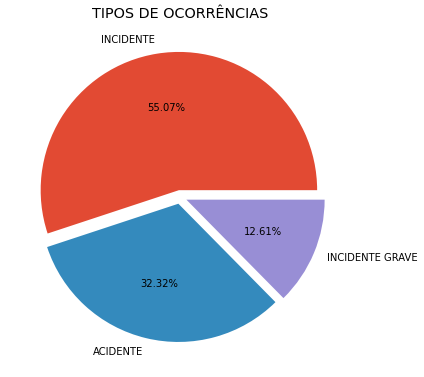

In [ ]:
# Tipos de Ocorrências - Percentual
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

labels = 'INCIDENTE', 'ACIDENTE', 'INCIDENTE GRAVE'
fracs = df_dados['tipo'].value_counts()

explode = (0.05, 0.05, 0.05)

pies = ax.pie(fracs, explode=explode, labels=labels, autopct='%1.2f%%')

ax.set_title("TIPOS DE OCORRÊNCIAS")

In [ ]:
mediaOcor = df_dados.groupby('tipo').mean()
mediaOcor

,codigo,ano,aeronaves_envolvidas,aeronave_assentos,aeronave_ano_fabricacao
tipo,,,,,
ACIDENTE,57202.711334,2014.396694,1.007084,4.142267,1833.508264
INCIDENTE,55622.233460,2013.971943,1.011431,44.659508,1869.988223
INCIDENTE GRAVE,58314.446293,2014.540091,1.025719,13.012103,1910.603631


In [ ]:
# Estudo sobre a Descrição das Ocorrências aéreas
descricao = df_dados['descricao'].value_counts()
descricao.head(60)

FALHA DO MOTOR EM VOO                                                                           632
ESTOURO DE PNEU                                                                                 566
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE                                              540
PERDA DE CONTROLE NO SOLO                                                                       427
PERDA DE CONTROLE EM VOO                                                                        333
OUTROS                                                                                          314
COM TREM DE POUSO                                                                               291
COLISÃO COM AVE                                                                                 271
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO                                               168
TRÁFEGO AÉREO                                                                                   120


# Análise
Analisando os dados apresentados acima, podemos observar que entre os anos de 2010 e 2019, ocorreram um total de 5.242 ocorrências aéreas no Brasil, essas ocorrências estão divididas em: **“Acidentes”** com um total de 1.694 acidentes, **“Incidentes”** com um total de 2.887 incidentes e **“Incidentes Graves”** com um total de 661 incidentes graves.
O Gráfico na Figura_01, apresenta os percentuais de 5.242 ocorrências, onde 32.32% são Acidentes, 55.07% são Incidentes e 12.61% são Incidentes Graves.
Podemos observar também que 46.96% das ocorrências foram causadas por falhas no equipamento, ou seja, quase a metade das ocorrências.


# Ocorrências por **Data**

## Informações referentes aos **Anos**
* Análise da quantidade de ocorências entre 2010 e 2019
* Separados por Tipos de Ocorrências

In [ ]:
## Capturando os Anos das ocorrências numa Lista

anos = set(df_dados['ano'])
ano = list(anos)
ano.sort()
print(ano)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [ ]:
## Criando um DataFrame com as Variáveis "ano" e "tipo"

df_AnoTipo = df_dados[['ano', 'tipo']]
acid = [] 
incid = []
incidGr = []

for x in ano:
  for a in df_AnoTipo[(df_AnoTipo.tipo == 'ACIDENTE') & (df_AnoTipo.ano == x)].value_counts():
    acid.append(a)
  for i in df_AnoTipo[(df_AnoTipo.tipo == 'INCIDENTE') & (df_AnoTipo.ano == x)].value_counts():
    incid.append(i)
  for ig in df_AnoTipo[(df_AnoTipo.tipo == 'INCIDENTE GRAVE') & (df_AnoTipo.ano == x)].value_counts():
    incidGr.append(ig)

aci = list(acid)
inc = list(incid)
inciGr = list(incidGr)



In [ ]:
# Ocultando alertas
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Distribuindo a quantidade e os tipos de ocorrências por ano
df_mediaAno = df_dados[['tipo']]

for i in ano:
    df_mediaAno[str(i)] = df_AnoTipo.ano == i

df_mediaAno.groupby('tipo').sum()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
tipo,,,,,,,,,,
ACIDENTE,129,187,206,198,176,171,163,146,166,152
INCIDENTE,362,323,364,386,315,250,191,232,198,266
INCIDENTE GRAVE,61,66,77,69,76,50,49,56,79,78


In [ ]:
# Media de tipos de ocorrências por ano
df_mediaAno.groupby('tipo').mean()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
tipo,,,,,,,,,,
ACIDENTE,0.076151,0.110390,0.121606,0.116883,0.103896,0.100945,0.096222,0.086187,0.097993,0.089728
INCIDENTE,0.125390,0.111881,0.126082,0.133703,0.109110,0.086595,0.066159,0.080360,0.068583,0.092137
INCIDENTE GRAVE,0.092284,0.099849,0.116490,0.104387,0.114977,0.075643,0.074130,0.084720,0.119516,0.118003


In [ ]:
# Desvio padrão dos tipos de ocorrências por ano
df_mediaAno.groupby('tipo').std()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
tipo,,,,,,,,,,
ACIDENTE,0.265318,0.313467,0.326926,0.321376,0.305216,0.301344,0.294982,0.280722,0.297393,0.285877
INCIDENTE,0.331218,0.315274,0.332000,0.340392,0.311831,0.281289,0.248602,0.271897,0.252788,0.289270
INCIDENTE GRAVE,0.289646,0.300025,0.321055,0.305994,0.319236,0.264626,0.262181,0.278676,0.324640,0.322856


In [ ]:
## Estatísticas Descritivas referentes ao nº de ocorrências
df_AnoTipo.describe()

,ano
count,5242.000000
mean,2014.180847
std,2.849750
min,2010.000000
25%,2012.000000
50%,2014.000000
75%,2017.000000
max,2019.000000


In [ ]:
## Função para inserir os valores de cada barra dos gráficos

def autolabel(ocorrencias):
    for i in ocorrencias:
        h = i.get_height()
        ax.annotate('{}'.format(h),
                   xy = (i.get_x()+i.get_width()/2,h),
                   xytext = (0,3),
                   textcoords = 'offset points',
                   ha = 'center')

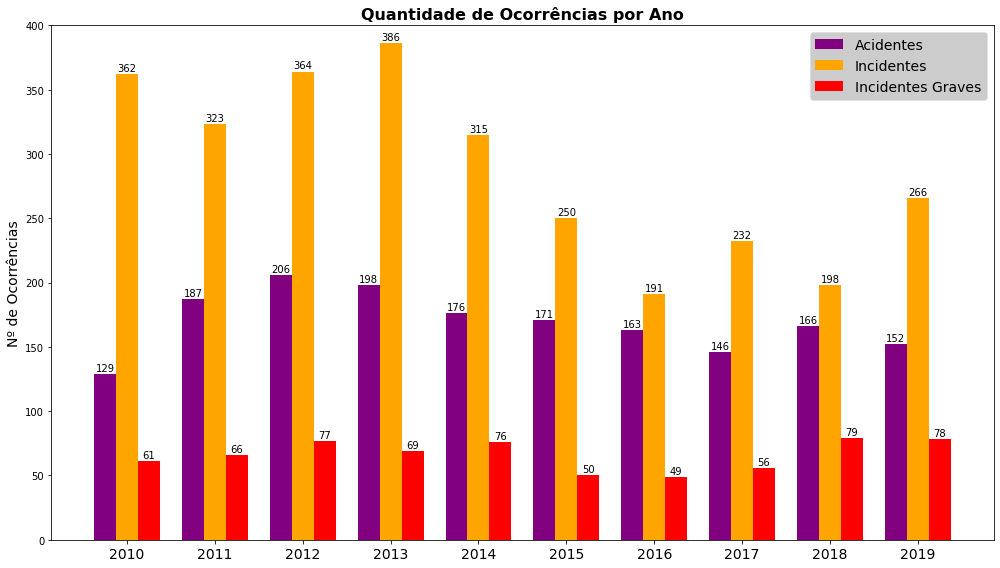

In [ ]:
## Grafico informativo sobre o número de ocorrências por ano

x = np.arange(len(ano))
largura = 0.25

fig,ax = plt.subplots(figsize = (14,8))

tp1 = ax.bar(x -largura, aci, largura, label='Acidentes', color='purple')
tp2 = ax.bar(x, inc, largura, label='Incidentes', color='orange')
tp3 = ax.bar(x +largura, inciGr, largura, label='Incidentes Graves', color='red')

ax.set_title('Quantidade de Ocorrências por Ano', fontsize=16, fontweight='bold')
ax.set_ylabel('Nº de Ocorrências', fontsize=14)

ax.set_xticks(x)
ax.set_xticklabels(ano, fontsize=14)

ax.set_ylim([0,400])
plt.tight_layout()

autolabel(tp1)
autolabel(tp2)
autolabel(tp3)

ax.legend(fontsize=14, frameon=True, facecolor='black', framealpha=0.2)
plt.show()

## Análise
O gráfico na Figura_02 mostra o total de “Acidentes”, “Incidentes” e “Incidentes Graves” em cada ano entre 2010 e 2019.
Podemos observar que nestes 10 anos de ocorrências aéreas, o ano de 2012 foi o ano em que ocorreu a maior taxa com 206 Acidentes, representando 12.16% do total de 1.694 e o ano de 2010 foi o ano em que ocorreu a menor taxa com 129 Acidentes representando 7.61%.
Em 2013 ocorreu a maior taxa com 386 Incidentes, representando 13.37% do total de 2.887 e o ano de 2016 foi o ano com a menor taxa com 191 Incidentes representando 6.61%.
Em 2018 ocorreu a maior taxa com 79 Incidentes Graves, representando 11.95% do total de 661 e o ano de 2016 foi o ano com a menor taxa com 49 Incidentes Graves representando 7.41%.
Podemos observar também que nos anos de 2010 e 2013, o número de Incidentes manteve-se acima de 320 ocorrências, porém, a partir de 2014 o número de incidentes teve uma queda significativa e no ano de 2016, os incidentes diminuíram praticamente pela metade comparado à 2013, já os Acidentes e Incidentes Graves tiveram seus altos e baixos durante esses 10 anos, mas com diferenças menos expressivas a cada ano.



## Informações referentes aos **Meses**
* Análise da quantidade de ocorências de Janeiro à Dezembro entre 2010 e 2019
* Separados por Tipos de Ocorrências

In [ ]:
## Criando um DataFrame com as Variáveis "data" e "tipo"

df_MesTipo = df_dados[['tipo', 'data']]

# Convertendo o objeto data para "datetime" 
df_MesTipo['data'] = pd.to_datetime(df_MesTipo['data'], format='%d/%m/%Y')
df_MesTipo.head()

,tipo,data
0,ACIDENTE,2010-01-12
1,ACIDENTE,2010-04-08
2,ACIDENTE,2010-03-19
3,ACIDENTE,2010-03-21
4,INCIDENTE GRAVE,2010-03-10


In [ ]:
# Criando a Coluna "Mês"
df_MesTipo['mes'] = df_MesTipo['data'].dt.month
df_MesTipo.head()

,tipo,data,mes
0,ACIDENTE,2010-01-12,1
1,ACIDENTE,2010-04-08,4
2,ACIDENTE,2010-03-19,3
3,ACIDENTE,2010-03-21,3
4,INCIDENTE GRAVE,2010-03-10,3


In [ ]:
## Capturando os Meses numa Lista
df_meses = []
meses = df_MesTipo['mes']
x = set(meses)
df_meses.append(x)
mes = list(df_meses[0])

nome_Mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

In [ ]:
## Criando 3 Listas contendo ( 'ACIDENTE', 'INCIDENTE' e 'INCIDENTE GRAVE' ) de cada Mês em 10 anos

df_MT = df_MesTipo[['mes', 'tipo']]
acid_mes = [] 
incid_mes = []
incidGr_mes = []

for x in mes:
    for a in df_MT[(df_MT.tipo == 'ACIDENTE') & (df_MT.mes == x)].value_counts():
        acid_mes.append(a)
    for i in df_MT[(df_MT.tipo == 'INCIDENTE') & (df_MT.mes == x)].value_counts():
        incid_mes.append(i)
    for ig in df_MT[(df_MT.tipo == 'INCIDENTE GRAVE') & (df_MT.mes == x)].value_counts():
        incidGr_mes.append(ig)

aci_mes = list(acid_mes)
inc_mes = list(incid_mes)
inciGr_mes = list(incidGr_mes)

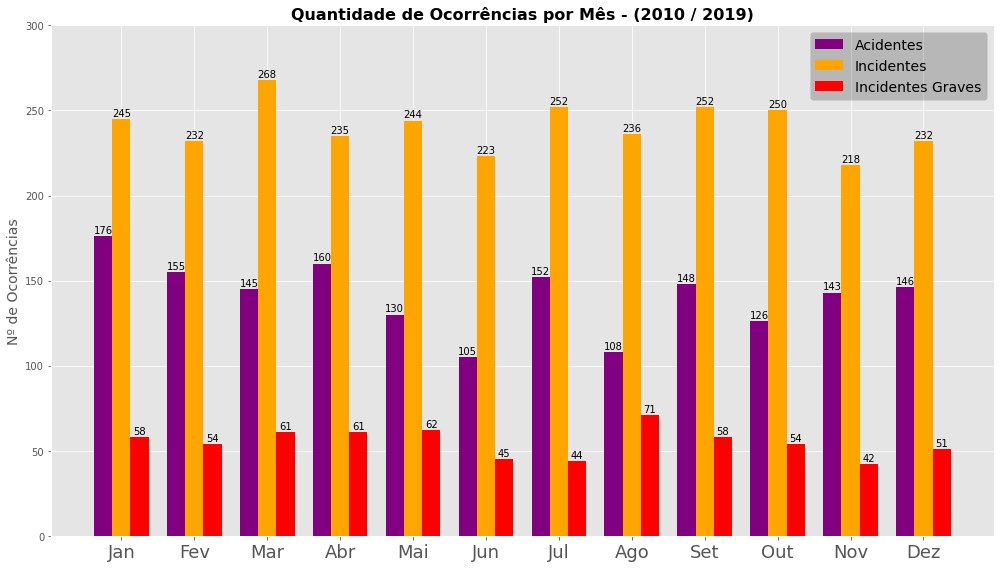

In [ ]:
## Grafico informativo sobre o número de ocorrências por mês

x = np.arange(len(mes))
largura = 0.25

fig,ax = plt.subplots(figsize = (14,8))

tp1 = ax.bar(x -largura, aci_mes, largura, label='Acidentes', color='purple')
tp2 = ax.bar(x, inc_mes, largura, label='Incidentes', color='orange')
tp3 = ax.bar(x +largura, inciGr_mes, largura, label='Incidentes Graves', color='red')

ax.set_title('Quantidade de Ocorrências por Mês - (2010 / 2019)', fontsize=16, fontweight='bold')
ax.set_ylabel('Nº de Ocorrências', fontsize=14)

ax.set_xticks(x)
ax.set_xticklabels(nome_Mes, fontsize=18)

ax.set_ylim([0,300])
plt.tight_layout()

autolabel(tp1)
autolabel(tp2)
autolabel(tp3)

ax.legend(fontsize=14, frameon=True, facecolor='black', framealpha=0.2)
plt.show()

## Análise
O gráfico na Figura_03 mostra o total de “Acidentes”, “Incidentes” e “Incidentes Graves” em cada mês entre 2010 e 2019.
Podemos observar que nestes 10 anos de ocorrências aéreas, os meses de janeiro juntos tiveram a maior taxa de Acidentes com 176 casos, representando 10.38% do total de 1.694 Acidentes e os meses de junho juntos tiveram a menor taxa de Acidentes com 105 casos, representando 6.19% do total, uma diferença de 71 casos de Acidentes.
Os meses de março juntos tiveram a maior taxa de Incidentes com 268 casos, representando 9.28% do total de 2.887 Incidentes e os meses de novembro juntos tiveram a menor taxa de Incidentes com 218 casos, representando 7.55% do total, uma diferença de 50 casos de Incidentes.
Os meses de agosto juntos tiveram a maior taxa de Incidentes Graves com 71 casos, representando 10.74% do total de 661 Incidentes Graves e os meses de novembro juntos tiveram a menor taxa de Incidentes Graves com 42 casos, representando 6.35% do total, uma diferença de 29 casos de Incidentes Graves.
Podemos observar também que, nestes 10 anos, os meses de janeiro juntos tiveram a maior taxa de ocorrências, incluindo Acidentes, Incidentes e Incidentes Graves com 479 casos, representando 9.13% do total de 5.242 ocorrências e os meses de junho juntos tiveram a menor taxa de ocorrências com 373 casos, representando 7.11% do total, uma diferença de 106 ocorrências.



## Informações referentes aos **Períodos Diários**
* Análise do número de ocorências nos períodos diários entre o ano de 2010 e 2019  
* **"Noturno"** (entre 18h e 06h) 
* **"Matutino"** (entre 06h e 12h)
* **"Vespertino"** (entre 12h e 18h)

* Separados por Tipos de Ocorrências

In [ ]:
#Criando um DataFrame contendo tipos de ocorência e horas das ocorrências
# Convertendo a coluna 'hora' para formato datetime
df_HoraTipo = df_dados[['tipo', 'hora']]
df_HoraTipo['hora'] = pd.to_datetime(df_HoraTipo['hora'], format='%H:%M:%S')

df_HoraTipo.head()

,tipo,hora
0,ACIDENTE,1900-01-01 14:30:00
1,ACIDENTE,1900-01-01 14:20:00
2,ACIDENTE,1900-01-01 19:30:00
3,ACIDENTE,1900-01-01 20:45:00
4,INCIDENTE GRAVE,1900-01-01 17:20:00


In [ ]:
# Criando Coluna "format_Hora"
df_HoraTipo['format_hr'] = df_HoraTipo['hora'].dt.hour
df_HoraTipo

,tipo,hora,format_hr
0,ACIDENTE,1900-01-01 14:30:00,14
1,ACIDENTE,1900-01-01 14:20:00,14
2,ACIDENTE,1900-01-01 19:30:00,19
3,ACIDENTE,1900-01-01 20:45:00,20
4,INCIDENTE GRAVE,1900-01-01 17:20:00,17
...,...,...,...
5237,ACIDENTE,1900-01-01 15:00:00,15
5238,ACIDENTE,1900-01-01 10:00:00,10
5239,ACIDENTE,1900-01-01 18:30:00,18
5240,INCIDENTE,1900-01-01 16:37:00,16


In [ ]:
# Criando Coluna "matutino"
df_HoraTipo['matutino'] = ((df_HoraTipo['format_hr'] >= 6) & (df_HoraTipo['format_hr'] < 12))
df_HoraTipo['matutino'].value_counts()

False    4521
True      721
Name: matutino, dtype: int64

In [ ]:
# Criando Coluna "vespertino"
df_HoraTipo['vespertino'] = ((df_HoraTipo['format_hr'] >= 12) & (df_HoraTipo['format_hr'] < 18))
df_HoraTipo['vespertino'].value_counts()

False    2981
True     2261
Name: vespertino, dtype: int64

In [ ]:
# Criando Coluna "noturno"
df_HoraTipo['noturno'] = ((df_HoraTipo['format_hr'] >= 0) & (df_HoraTipo['format_hr'] < 6) ^ (df_HoraTipo['format_hr'] >= 18) & (df_HoraTipo['format_hr'] <= 23))
df_HoraTipo['noturno'].value_counts()

False    2982
True     2260
Name: noturno, dtype: int64

In [ ]:
# Criando lista de Períodos do dia

periodo_dia = ['noturno / 18h-06h', 'matutino / 6h-12h', 'vespertino / 12h-18h']
periodo_dia

['noturno / 18h-06h', 'matutino / 6h-12h', 'vespertino / 12h-18h']

In [ ]:
# Capturando em listas "Acidente, Incidente e Incidente Grave" em "Noturno", "Matutino" e "Vespertino"

noturno_aci = df_HoraTipo.loc[(df_HoraTipo['tipo'] == 'ACIDENTE') & (df_HoraTipo['noturno'] == True)].value_counts()
noturno_inc = df_HoraTipo.loc[(df_HoraTipo['tipo'] == 'INCIDENTE') & (df_HoraTipo['noturno'] == True)].value_counts()
noturno_incGr = df_HoraTipo.loc[(df_HoraTipo['tipo'] == 'INCIDENTE GRAVE') & (df_HoraTipo['noturno'] == True)].value_counts()

matutino_aci = df_HoraTipo.loc[(df_HoraTipo['tipo'] == 'ACIDENTE') & (df_HoraTipo['matutino'] == True)].value_counts()
matutino_inc = df_HoraTipo.loc[(df_HoraTipo['tipo'] == 'INCIDENTE') & (df_HoraTipo['matutino'] == True)].value_counts()
matutino_incGr = df_HoraTipo.loc[(df_HoraTipo['tipo'] == 'INCIDENTE GRAVE') & (df_HoraTipo['matutino'] == True)].value_counts()

vespertino_aci = df_HoraTipo.loc[(df_HoraTipo['tipo'] == 'ACIDENTE') & (df_HoraTipo['vespertino'] == True)].value_counts()
vespertino_inc = df_HoraTipo.loc[(df_HoraTipo['tipo'] == 'INCIDENTE') & (df_HoraTipo['vespertino'] == True)].value_counts()
vespertino_incGr = df_HoraTipo.loc[(df_HoraTipo['tipo'] == 'INCIDENTE GRAVE') & (df_HoraTipo['vespertino'] == True)].value_counts()

per_aci = [noturno_aci.sum(),matutino_aci.sum(),vespertino_aci.sum()]
per_inc = [noturno_inc.sum(),matutino_inc.sum(),vespertino_inc.sum()]
per_incGr = [noturno_incGr.sum(),matutino_incGr.sum(),vespertino_incGr.sum()]

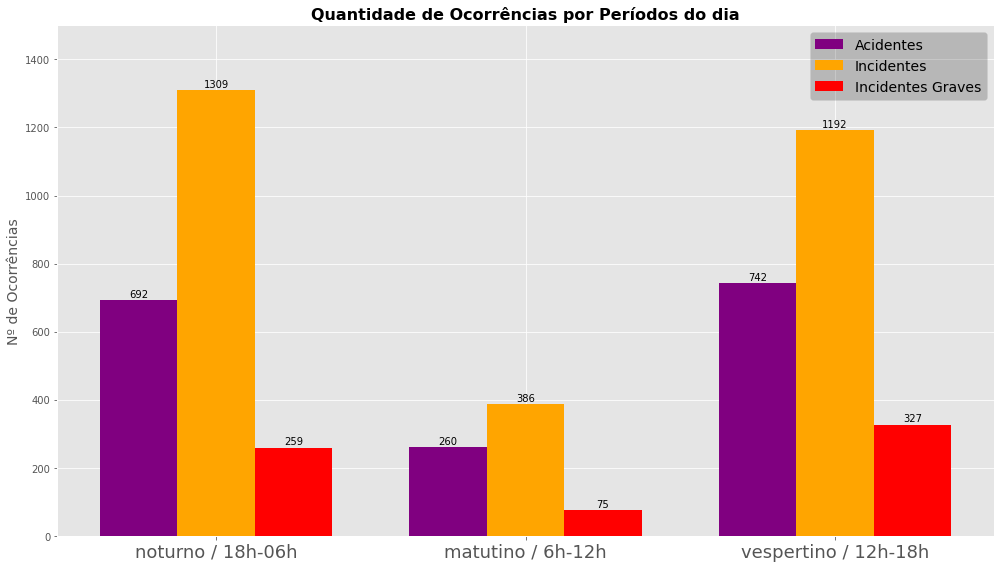

In [ ]:
## Grafico informativo sobre o número de ocorrências por períodos diários

x = np.arange(len(periodo_dia))
largura = 0.25

fig,ax = plt.subplots(figsize = (14,8))

tp1 = ax.bar(x -largura, per_aci, largura, label='Acidentes', color='purple')
tp2 = ax.bar(x, per_inc, largura, label='Incidentes', color='orange')
tp3 = ax.bar(x +largura, per_incGr, largura, label='Incidentes Graves', color='red')

ax.set_title('Quantidade de Ocorrências por Períodos do dia', fontsize=16, fontweight='bold')
ax.set_ylabel('Nº de Ocorrências', fontsize=14)

ax.set_xticks(x)
ax.set_xticklabels(periodo_dia, fontsize=18)

ax.set_ylim([0,1500])
plt.tight_layout()

autolabel(tp1)
autolabel(tp2)
autolabel(tp3)

ax.legend(fontsize=14, frameon=True, facecolor='black', framealpha=0.2)
plt.show()

## Análise
O gráfico na Figura_04 mostra o total de “Acidentes”, “Incidentes” e “Incidentes Graves” em cada período do dia, sendo eles “Matutino”, “Vespertino” e “Noturno” entre 2010 e 2019.
Podemos observar que nestes 10 anos de ocorrências aéreas, o período Matutino, ou seja, entre 6:00h e 12:00h, teve a menor taxa de ocorrências com 721 casos, representando 13.75% do total de 5.242 ocorrências e os períodos Vespertino (12:00h até 18:00h) e o período Noturno (18:00h até 6:00h) tiveram as maiores taxas de ocorrências com 2.261 e 2.260 casos respectivamente, representando 86.25% do total, uma diferença de 3800 ocorrências.
Vale lembrar que este gráfico apresenta o período Noturno com 12 horas corridas e os períodos Matutino e Vespertino com 6 horas corridas cada, ou seja, 12 horas de céu escuro com 2.260 ocorrências e 12 horas de céu claro com 2.982 ocorrências.
Com base nos dados é possível afirmar que, em questão de segurança de voos, o estudo sinaliza que viajar durante o período entre 18:00h e 6:00h da manhã é mais seguro em relação aos outros períodos, representando 43.11% do total de 5.242 ocorrências.

# Ocorrências por **Localização**


## Informações referentes aos **Estados**
* Mostrando Ocorrências em *números* e *percentuais* por estado e tipo de ocorrência
* Foi criado um gráfico utilizando a biblioteca `Matplotlib` agrupando os dados Tipo e Estado do Dataframe, para visualizar a quantidade de ocorrências por tipo dentro de cada estado
* O gráfico que foi usado é um Histograma e foi utilizado o estilo(Style) ggplot para o gráfico

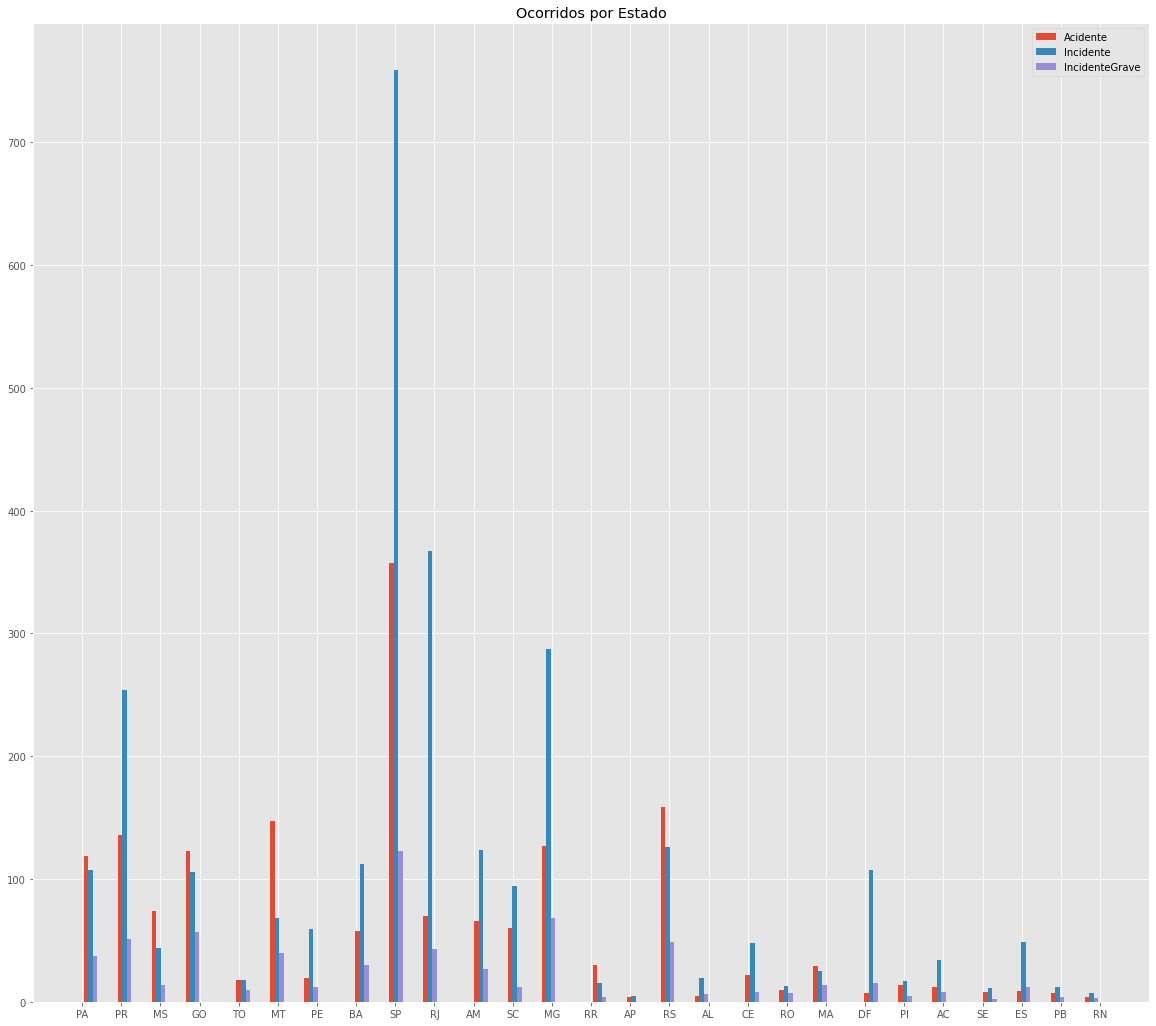

In [ ]:
# Figura_05
plt.style.use("ggplot")
plt.figure( figsize=(20, 18))
plt.title('Ocorridos por Estado')
plt.hist(df_dados.groupby(by=['tipo'])['estado'].apply(list), label=('Acidente','Incidente','IncidenteGrave'), bins=60 )
plt.legend()
plt.show()

In [ ]:
df_TipoEstado = df_dados[['tipo', 'estado']]
df_CountTipoE = df_dados.groupby(by=['estado'])['tipo'].value_counts()
df_CountTipoE.groupby('estado').describe()

,count,mean,std,min,25%,50%,75%,max
estado,,,,,,,,
AC,3.0,18.000000,14.000000,8.0,10.00,12.0,23.00,34.0
AL,3.0,10.000000,7.810250,5.0,5.50,6.0,12.50,19.0
AM,3.0,72.333333,48.809152,27.0,46.50,66.0,95.00,124.0
AP,2.0,4.500000,0.707107,4.0,4.25,4.5,4.75,5.0
BA,3.0,66.666667,41.681331,30.0,44.00,58.0,85.00,112.0
CE,3.0,26.000000,20.297783,8.0,15.00,22.0,35.00,48.0
DF,3.0,43.000000,55.569776,7.0,11.00,15.0,61.00,107.0
ES,3.0,23.333333,22.278540,9.0,10.50,12.0,30.50,49.0
GO,3.0,95.333333,34.268547,57.0,81.50,106.0,114.50,123.0


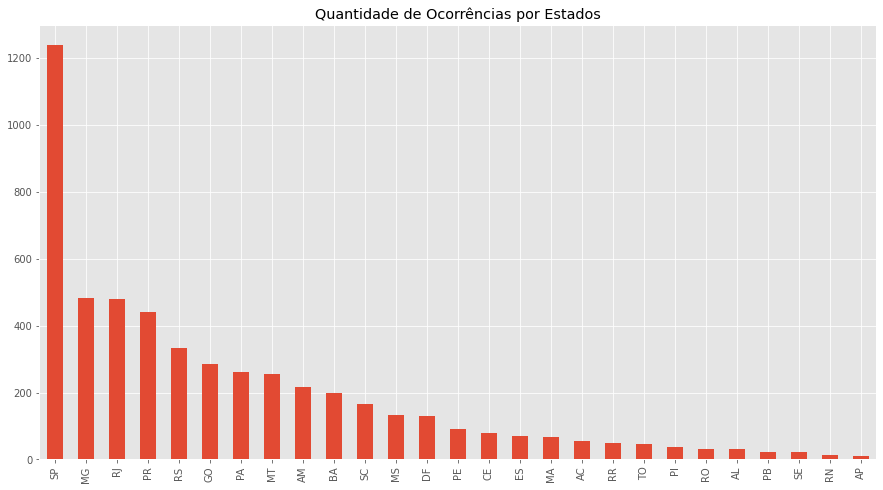

In [ ]:
# Figura_06
plt.style.use("ggplot")
acidentes_uf_bar = df_dados['estado'].value_counts().sort_values(ascending=[False]).plot(kind='bar',
                                                         subplots=True,
                                                         label='Quantidade de Ocorrências por Estados',
                                                         figsize=(15,8))

In [ ]:
df_CountTipoE2 = df_dados.groupby(by=['tipo'])['estado'].value_counts()
df_CountTipoE2.groupby('estado').sum()

estado
AC      54
AL      30
AM     217
AP       9
BA     200
CE      78
DF     129
ES      70
GO     286
MA      68
MG     482
MS     132
MT     255
PA     263
PB      23
PE      90
PI      36
PR     441
RJ     480
RN      14
RO      30
RR      49
RS     334
SC     166
SE      21
SP    1239
TO      46
Name: estado, dtype: int64

In [ ]:
df_CountTipoE2.groupby('estado').mean()

estado
AC     18.000000
AL     10.000000
AM     72.333333
AP      4.500000
BA     66.666667
CE     26.000000
DF     43.000000
ES     23.333333
GO     95.333333
MA     22.666667
MG    160.666667
MS     44.000000
MT     85.000000
PA     87.666667
PB      7.666667
PE     30.000000
PI     12.000000
PR    147.000000
RJ    160.000000
RN      4.666667
RO     10.000000
RR     16.333333
RS    111.333333
SC     55.333333
SE      7.000000
SP    413.000000
TO     15.333333
Name: estado, dtype: float64

## Analise
* A Figura_05 mostra um Gráfico com os valores de cada Estado contendo o número de ocorrências por tipo, separados por Acidente, Incidente e Incidente Grave
* A Figura_06 mostra um Gráfico com os valores gerais em números de ocorrências por Estado, representando 23.63% do total de 5.242 ocorrências. 

## Informações referentes as **Cidades**
* Neste Grafico foi utilizado o agrupamento dos tipos de ocorrência com as cidades
* Foi feito uma contagem dos valores (value_counts()) e um filtro dos maiores números(sort_values) de ocorrências por cidade.
* Foi mostrado apenas os 10 maiores valores(Head(10) e criado um gráfico de barra utilizando o Matplot

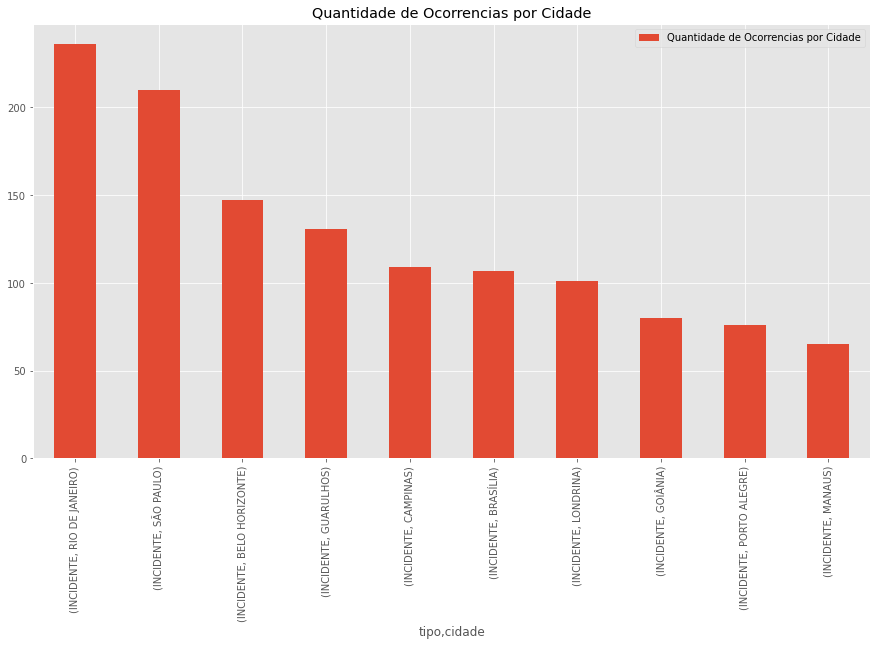

In [ ]:
# Figura_07
plt.style.use("ggplot")
df_CountTipoC = df_dados.groupby(by=["tipo"])["cidade"].value_counts().sort_values(ascending=[False])
df_CountTipoC.head(10).plot(kind='bar',subplots=True,label='Quantidade de Ocorrencias por Cidade',figsize=(15,8))
plt.legend()
#plt.figure( figsize=(20, 18))
#plt.hist(df.groupby(by=["tipo"])["cidade"].apply(list), bins=60)


In [ ]:
# Número de ocorrências por Cidades
df_Cidades = df_dados[['cidade']].value_counts()
df_Cidades

cidade        
RIO DE JANEIRO    293
SÃO PAULO         252
BELO HORIZONTE    174
GUARULHOS         141
GOIÂNIA           132
                 ... 
IBIPORÃ             1
IBATÉ               1
IBATEGUARA          1
IARAS               1
DRACENA             1
Length: 1042, dtype: int64

In [ ]:
# Media de tipos de ocorrências por Cidades
df_CountTipoC.groupby('cidade').mean().sort_values(ascending=[False])

cidade
RIO DE JANEIRO                97.666667
SÃO PAULO                     84.000000
BELO HORIZONTE                58.000000
GUARULHOS                     47.000000
GOIÂNIA                       44.000000
                                ...    
SANTO ANDRÉ                    1.000000
SANTO ANTÔNIO DE GOIÁS         1.000000
SANTO ANTÔNIO DO ARACANGUÁ     1.000000
ITUIUTABA                      1.000000
ÓBIDOS                         1.000000
Name: cidade, Length: 1042, dtype: float64

In [ ]:
# Desvio padrão dos tipos de ocorrências por Cidades
df_CountTipoC.groupby('cidade').std().sort_values(ascending=[False])

cidade
RIO DE JANEIRO     119.926366
SÃO PAULO          109.160432
BELO HORIZONTE      77.090855
GUARULHOS           72.753007
CAMPINAS            58.889727
                      ...    
ÁGUA BRANCA               NaN
ÁGUA CLARA                NaN
ÁGUA LIMPA                NaN
ÁLVARES MACHADO           NaN
ÂNGULO                    NaN
Name: cidade, Length: 1042, dtype: float64

## Analise
A Figura_07 mostra um Gráfico descrevendo as ocorrências por cidades, com os 10 maiores valores, independentemente do tipo de ocorrência, podemos analisar que a cidade com o maior número de ocorrências é a cidade do Rio de Janeiro, representando 5.58% do total de 5.242 ocorrências.

# Ocorrências por **Tipos de Aeronaves**

## Informações Descritivas referentes aos Tipos de Aeronaves
* Análise de ocorências e Tipos de Aeronaves envolvidas entre 2010 e 2019
* Separados por Tipos de Ocorrências

In [ ]:
# Criando um DataFrame com os "Tipos de Ocorrências" e os tipos de "Aeronaves Envolvidas"
df_modeloOcorr = df_dados[['tipo', 'aeronave_tipo']]
df_modeloOcorr.sample(10)

,tipo,aeronave_tipo
2490,INCIDENTE,AVIÃO
305,INCIDENTE,AVIÃO
5110,INCIDENTE,AVIÃO
4733,INCIDENTE,INDETERMINADO
1526,ACIDENTE,AVIÃO
941,INCIDENTE,AVIÃO
3475,ACIDENTE,AVIÃO
878,ACIDENTE,AVIÃO
132,INCIDENTE,AVIÃO
2728,INCIDENTE,AVIÃO


In [ ]:
# Fazendo uma contagem de todas ocorrências com cada aeronave
aeronave = df_modeloOcorr['aeronave_tipo'].value_counts()
aeronave

AVIÃO            4213
HELICÓPTERO       600
ULTRALEVE         308
INDETERMINADO      86
PLANADOR           15
ANFÍBIO            12
TRIKE               5
DIRIGÍVEL           1
HIDROAVIÃO          1
BALÃO               1
Name: aeronave_tipo, dtype: int64

In [ ]:
# Criando um DataFrame específico para cada Aeronave e suas respectivas ocorrências
df_aeroTipo = df_dados[['tipo']]
for i in df_modeloOcorr.aeronave_tipo:
    df_aeroTipo[i] = df_modeloOcorr.aeronave_tipo == i

# Fazendo a contagem de cada ocorrências para cada aeronave
df_aeroTipo.groupby('tipo').sum()

,AVIÃO,HELICÓPTERO,ULTRALEVE,ANFÍBIO,PLANADOR,DIRIGÍVEL,INDETERMINADO,TRIKE,BALÃO,HIDROAVIÃO
tipo,,,,,,,,,,
ACIDENTE,1212,206,218,7,10,1,34,5,1,0
INCIDENTE,2441,343,53,4,2,0,43,0,0,1
INCIDENTE GRAVE,560,51,37,1,3,0,9,0,0,0


In [ ]:
pd.pivot_table(df_aeroTipo,
               values=['AVIÃO', 'HELICÓPTERO', 'ULTRALEVE'],
               index='tipo',
               aggfunc='sum',
               margins=True)

,AVIÃO,HELICÓPTERO,ULTRALEVE
tipo,,,
ACIDENTE,1212,206,218
INCIDENTE,2441,343,53
INCIDENTE GRAVE,560,51,37
All,4213,600,308


In [ ]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

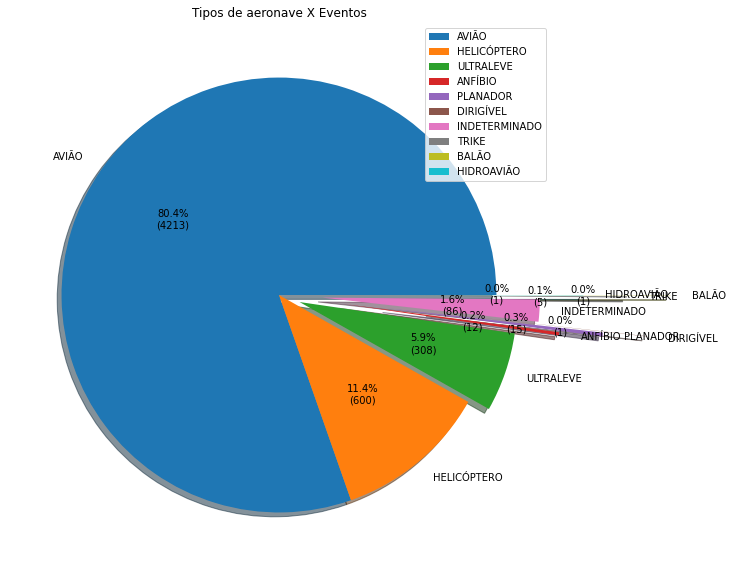

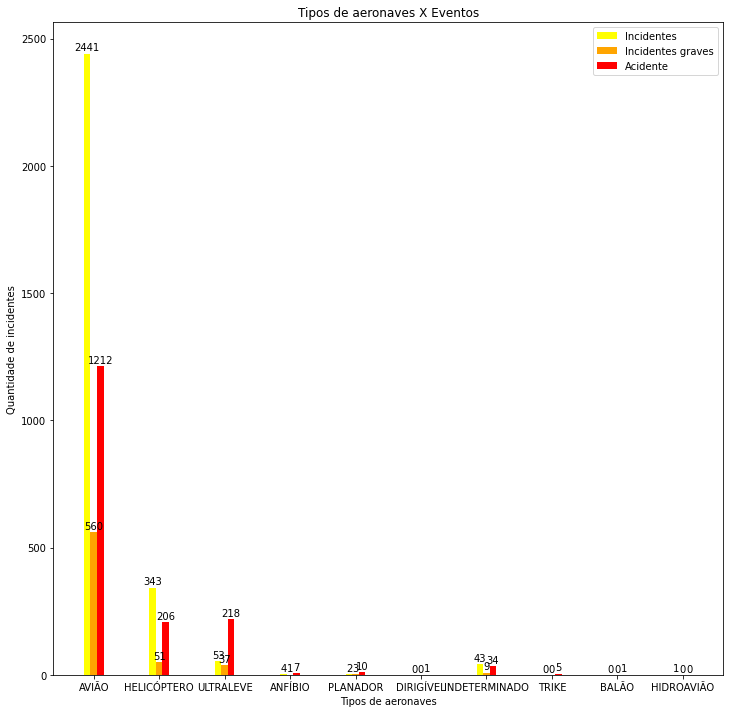

In [ ]:
# Figura_08
tipos_aeronaves = df_dados['aeronave_tipo'].unique() #todos os tipos de aeronaves em uma lista

qte_por_tipo = [sum(df_dados.loc[df_dados['aeronave_tipo'] == i].value_counts()) for i in tipos_aeronaves]
qte_inc_por_tipo = [list(sum(df_dados.loc[(df_dados['aeronave_tipo']==i) & (df_dados['tipo']=='INCIDENTE')].value_counts()) for i in tipos_aeronaves),
                    list(sum(df_dados.loc[(df_dados['aeronave_tipo']==i) & (df_dados['tipo']=='INCIDENTE GRAVE')].value_counts()) for i in tipos_aeronaves),
                    list(sum(df_dados.loc[(df_dados['aeronave_tipo']==i) & (df_dados['tipo']=='ACIDENTE')].value_counts()) for i in tipos_aeronaves)]
pos_qteportipo = np.arange(len(qte_por_tipo))
explode = [0,0,0.1,0.3,0.5,0.7,0.2,0.6,0.8,0.4]

fig1, ax1 = plt.subplots(figsize=(10,10))
fig, ax = plt.subplots(figsize=(12,12))

container_tipo_aeronave = ax1.pie(qte_por_tipo, labels=tipos_aeronaves, explode=explode, autopct=lambda pct: func(pct, qte_por_tipo), shadow=True, startangle=0)
container_inc = ax.bar(pos_qteportipo - 0.1, qte_inc_por_tipo[0], 0.1, label='Incidentes', color='Yellow')
container_incg = ax.bar(pos_qteportipo, qte_inc_por_tipo[1], 0.1, label='Incidentes graves', color='Orange')
container_acid = ax.bar(pos_qteportipo + 0.1, qte_inc_por_tipo[2], 0.1, label='Acidente', color='Red')

ax.set_xticks(pos_qteportipo)
ax.set_xticklabels(tipos_aeronaves)
ax.set_title('Tipos de aeronaves X Eventos')
ax.set_xlabel('Tipos de aeronaves')
ax.set_ylabel('Quantidade de incidentes')

autolabel(container_inc)
autolabel(container_incg)
autolabel(container_acid)

ax1.set_title('Tipos de aeronave X Eventos')
ax1.legend(tipos_aeronaves)

plt.legend()
plt.show()

## Informações Estatísticas referentes aos Tipos de Aeronaves
* Análise estatísticas das ocorrências e Tipos de Aeronaves envolvidas entre 2010 e 2019
* Separados por Tipos de Ocorrências

In [ ]:
# Média
df_aeroTipo.groupby('tipo').mean()

,AVIÃO,HELICÓPTERO,ULTRALEVE,ANFÍBIO,PLANADOR,DIRIGÍVEL,INDETERMINADO,TRIKE,BALÃO,HIDROAVIÃO
tipo,,,,,,,,,,
ACIDENTE,0.715466,0.121606,0.128689,0.004132,0.005903,0.00059,0.020071,0.002952,0.00059,0.000000
INCIDENTE,0.845514,0.118808,0.018358,0.001386,0.000693,0.00000,0.014894,0.000000,0.00000,0.000346
INCIDENTE GRAVE,0.847201,0.077156,0.055976,0.001513,0.004539,0.00000,0.013616,0.000000,0.00000,0.000000


In [ ]:
# Desvio Padrão
df_aeroTipo.groupby('tipo').std()

,AVIÃO,HELICÓPTERO,ULTRALEVE,ANFÍBIO,PLANADOR,DIRIGÍVEL,INDETERMINADO,TRIKE,BALÃO,HIDROAVIÃO
tipo,,,,,,,,,,
ACIDENTE,0.451325,0.326926,0.334955,0.064168,0.076628,0.024296,0.140284,0.054264,0.024296,0.000000
INCIDENTE,0.361476,0.323619,0.134266,0.037203,0.026316,0.000000,0.121151,0.000000,0.000000,0.018611
INCIDENTE GRAVE,0.360066,0.267041,0.230049,0.038895,0.067267,0.000000,0.115977,0.000000,0.000000,0.000000


In [ ]:
# Correlação
df_aeroTipo.corr()

,AVIÃO,HELICÓPTERO,ULTRALEVE,ANFÍBIO,PLANADOR,DIRIGÍVEL,INDETERMINADO,TRIKE,BALÃO,HIDROAVIÃO
AVIÃO,1.000000,-0.727463,-0.505550,-0.096923,-0.108395,-0.027950,-0.261325,-0.062522,-0.027950,-0.027950
HELICÓPTERO,-0.727463,1.000000,-0.089825,-0.017221,-0.019259,-0.004966,-0.046432,-0.011109,-0.004966,-0.004966
ULTRALEVE,-0.505550,-0.089825,1.000000,-0.011968,-0.013384,-0.003451,-0.032268,-0.007720,-0.003451,-0.003451
ANFÍBIO,-0.096923,-0.017221,-0.011968,1.000000,-0.002566,-0.000662,-0.006186,-0.001480,-0.000662,-0.000662
PLANADOR,-0.108395,-0.019259,-0.013384,-0.002566,1.000000,-0.000740,-0.006919,-0.001655,-0.000740,-0.000740
DIRIGÍVEL,-0.027950,-0.004966,-0.003451,-0.000662,-0.000740,1.000000,-0.001784,-0.000427,-0.000191,-0.000191
INDETERMINADO,-0.261325,-0.046432,-0.032268,-0.006186,-0.006919,-0.001784,1.000000,-0.003991,-0.001784,-0.001784
TRIKE,-0.062522,-0.011109,-0.007720,-0.001480,-0.001655,-0.000427,-0.003991,1.000000,-0.000427,-0.000427
BALÃO,-0.027950,-0.004966,-0.003451,-0.000662,-0.000740,-0.000191,-0.001784,-0.000427,1.000000,-0.000191
HIDROAVIÃO,-0.027950,-0.004966,-0.003451,-0.000662,-0.000740,-0.000191,-0.001784,-0.000427,-0.000191,1.000000


## Análise
Hidroavião, Balão e Dirigível (1 ocorrência cada), Trike (5 ocorrências), Anfíbio (12 ocorrências), Planador (15 ocorrências), Avião (4.213 ocorrências), Helicóptero (600 ocorrências), Ultraleve (308 ocorrências).
Com base nos dados e na Figura_08, é possível afirmar que Hidroavião, Balão, Dirigível, Trike, Anfíbio e Planador são potencialmente mais seguros do que Avião, Helicóptero e Ultraleve.
Estes meios de transportes são mais seguros porque tiveram a menor taxa de ocorrências com 35 casos, representando 0.67% do total de 5.242 ocorrências em 10 anos, já os meios de transportes como o Avião, Helicóptero e Ultraleve, tiveram juntos 5.121 casos, representando 97.69% do total.

## Informações referentes aos **Fabricantes das Aeronaves** envolvidas nas ocorrências

In [ ]:
## Capturando os Fabricantes das aeronaves numa Lista

fabr = set(df_dados['aeronave_fabricante'])
fabricantes = list(fabr)
fabricantes.sort()
print(fabricantes)

['AERO BOERO', 'AERO COMMANDER', 'AEROALCOOL TECNOLOGIA LTDA', 'AEROBRAVO', 'AEROBRAVO INDÚSTRIA AERONÁUTICA LTDA', 'AEROBRAVO LTDA', 'AEROCENTRO AERONAVES', 'AEROMOT', 'AEROSPATIALE AND ALENIA', 'AEROTEC', 'AGUSTA', 'AILTON MARTINS DE OLIVEIRA', 'AIR TRACTOR', 'AIR TRACTOR INC.', 'AIRBUS', 'AIRBUS INDUSTRIE', 'AIRCRAFT INDUSTRIES', 'ALBERTO BENEDITO PAULO IRALAH', 'ALLIANCE AIRCRAFT', 'ALOIZIO RODRIGUES', 'AMERICAN CHAMPION', 'ANDERSON BRITO SPINELLI', 'ANDRE A.FERDINAND', 'ANDRE ALEXANDRE FERDINAND DE REYNIER', 'ANTONINO MOTA', 'ANTONIO CESAR DA SILVA AMARAL', 'ANTONIO ETTORE NALLIN', 'ASTRO TOYS COM. DE BRINQ. LTDA', 'AUGUSTO LUIZ CAMPOS BARROSO', 'AVENOR AUGUSTO MONTANDON', 'AVIONS MUDRY', 'BEECH AIRCRAFT', 'BELL HELICOPTER', 'BOEING COMPANY', 'BRITTEN-NORMAN', 'CARLOS ALBERTO VALENTE', 'CARLOS EDUARDO NASCIMENTO SEVERO', 'CARLOS GERALDINO DA SILVA PADILHA', 'CARLOS GILBERTO FRAGA MARQUES', 'CARLOS HENRIQUE FONSECA DE OLIVEIRA', 'CESSNA AIRCRAFT', 'CHALLENGER DO BRASIL', 'CHELBER V

In [ ]:
## Criando um DataFrame com as Variáveis "fabricante" e "tipo"

df_FabriTipo = df_dados[['aeronave_fabricante', 'tipo']]
acidF = [] 
incidF = []
incidGrF = []

for x in fabricantes:
  for a in df_FabriTipo[(df_FabriTipo.tipo == 'ACIDENTE') & (df_FabriTipo.aeronave_fabricante == x)].value_counts():
    acidF.append(a)
  for i in df_FabriTipo[(df_FabriTipo.tipo == 'INCIDENTE') & (df_FabriTipo.aeronave_fabricante == x)].value_counts():
    incidF.append(i)
  for ig in df_FabriTipo[(df_FabriTipo.tipo == 'INCIDENTE GRAVE') & (df_FabriTipo.aeronave_fabricante == x)].value_counts():
    incidGrF.append(ig)

aciF = list(acidF)
incF = list(incidF)
inciGrF = list(incidGrF)

In [ ]:
df_fabric = df_dados[['aeronave_fabricante']].value_counts()
df_fabric.head(60)

aeronave_fabricante                    
CESSNA AIRCRAFT                            800
EMBRAER                                    589
NEIVA INDUSTRIA AERONAUTICA                583
PIPER AIRCRAFT                             373
INDETERMINADO                              286
AIRBUS INDUSTRIE                           273
BOEING COMPANY                             272
BEECH AIRCRAFT                             267
AEROSPATIALE AND ALENIA                    243
AERO BOERO                                 179
ROBINSON HELICOPTER                        142
SIKORSKY AIRCRAFT                          134
HELIBRAS                                    89
EUROCOPTER FRANCE                           85
CIRRUS DESIGN                               76
BELL HELICOPTER                             63
AGUSTA                                      57
AIR TRACTOR                                 55
LEARJET                                     51
HAWKER BEECHCRAFT                           47
RAYTHEON AIRCRAFT   

In [ ]:
# Distribuindo a quantidade e os tipos de ocorrências por Fabricantes
df_mediaFabri = df_dados[['tipo']]

for i in fabricantes:
    df_mediaFabri[str(i)] = df_FabriTipo.aeronave_fabricante == i

df_mediaFabri.groupby('tipo').sum()

,AERO BOERO,AERO COMMANDER,AEROALCOOL TECNOLOGIA LTDA,AEROBRAVO,AEROBRAVO INDÚSTRIA AERONÁUTICA LTDA,AEROBRAVO LTDA,AEROCENTRO AERONAVES,AEROMOT,AEROSPATIALE AND ALENIA,AEROTEC,AGUSTA,AILTON MARTINS DE OLIVEIRA,AIR TRACTOR,AIR TRACTOR INC.,AIRBUS,AIRBUS INDUSTRIE,AIRCRAFT INDUSTRIES,ALBERTO BENEDITO PAULO IRALAH,ALLIANCE AIRCRAFT,ALOIZIO RODRIGUES,AMERICAN CHAMPION,ANDERSON BRITO SPINELLI,ANDRE A.FERDINAND,ANDRE ALEXANDRE FERDINAND DE REYNIER,ANTONINO MOTA,ANTONIO CESAR DA SILVA AMARAL,ANTONIO ETTORE NALLIN,ASTRO TOYS COM. DE BRINQ. LTDA,AUGUSTO LUIZ CAMPOS BARROSO,AVENOR AUGUSTO MONTANDON,AVIONS MUDRY,BEECH AIRCRAFT,BELL HELICOPTER,BOEING COMPANY,BRITTEN-NORMAN,CARLOS ALBERTO VALENTE,CARLOS EDUARDO NASCIMENTO SEVERO,CARLOS GERALDINO DA SILVA PADILHA,CARLOS GILBERTO FRAGA MARQUES,CARLOS HENRIQUE FONSECA DE OLIVEIRA,...,ROBSON DIAS LIMA,ROCKWELL,RODRIGO DE QUEIROZ R. COSTA,ROGER AGNELLI,ROGERS THOMAS,ROMULO ARAUJO / HUGO FREIRE M JUNIOR,RUBEM ROCHA SANTANA,RUBENS ANTONIO AZEVEDO,RUPERT INDUSTRIA AERONAUTICA,SAFARI HELICOPTER CO. INTERNATIONAL,SCHWEIZER,SCODA AERONÁUTICA,SEBASTIÃO DE PAULA DO NASCIMENTO,SERGIO MAURO,SHEMPP-HIRTH FLUGZEUBAU,SIKORSKY AIRCRAFT,SK,SLICK AIRCRAFT COMPANY,SOCATA,SONEX LTDA,SPS TRADING IMP. E EXPORTADORA LTDA,STINSON AIRCRAFT,SUZANE MARI PIANA,TACILLO JACOB FROHLICH,TARSO GOROZEVSKI,TECNAM CONSTRUZIONI AERONAUTICHE,TERRA AMBIENTAL E INCORPORADORA LTDA,TEXTRON AVIATION,TEXTRON AVIATION INC,THRUSH AIRCRAFT,TOMAS EDSON ANDRADE DA CUNHA,TRIKE ICAROS IND. AER. LTDA.,TRIKE ICAROS LTDA,TWIN COMMANDER,ULTRALEGER,VECTOR ULTRALIGHT INDUSTRIA E COMERCIO,VERA LUCIA NICIOLI,VINICIUS MARINI FERREIRA,WILLIAM DA SILVA MATIAS,XAVANTE
tipo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACIDENTE,50,0,3,0,1,5,1,3,5,1,7,1,36,0,0,4,1,1,1,0,2,0,2,0,1,0,0,0,0,2,1,82,28,4,2,0,0,0,0,0,...,1,2,0,1,0,1,0,0,0,1,1,0,0,1,1,3,0,1,4,1,1,1,1,2,1,2,0,1,0,3,0,1,4,0,3,2,0,1,0,3
INCIDENTE,79,1,0,1,0,7,0,10,224,0,44,0,10,0,1,258,3,0,0,1,1,1,0,1,0,0,0,1,1,0,0,140,31,254,2,1,1,1,0,0,...,0,0,1,0,1,0,1,1,1,0,1,0,1,0,0,121,2,0,2,0,0,0,0,0,0,0,1,0,1,1,0,0,0,6,0,0,1,0,1,4
INCIDENTE GRAVE,50,0,0,0,0,1,0,2,14,0,6,0,9,1,0,11,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,45,4,14,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,0,0,2,0,0,0,0,0,0,1,1,1,0,0,1,0,0,4,0,0,0,0,0,3


In [ ]:
# Media de tipos de ocorrências por Fabricante
df_mediaFabri.groupby('tipo').mean()

,AERO BOERO,AERO COMMANDER,AEROALCOOL TECNOLOGIA LTDA,AEROBRAVO,AEROBRAVO INDÚSTRIA AERONÁUTICA LTDA,AEROBRAVO LTDA,AEROCENTRO AERONAVES,AEROMOT,AEROSPATIALE AND ALENIA,AEROTEC,AGUSTA,AILTON MARTINS DE OLIVEIRA,AIR TRACTOR,AIR TRACTOR INC.,AIRBUS,AIRBUS INDUSTRIE,AIRCRAFT INDUSTRIES,ALBERTO BENEDITO PAULO IRALAH,ALLIANCE AIRCRAFT,ALOIZIO RODRIGUES,AMERICAN CHAMPION,ANDERSON BRITO SPINELLI,ANDRE A.FERDINAND,ANDRE ALEXANDRE FERDINAND DE REYNIER,ANTONINO MOTA,ANTONIO CESAR DA SILVA AMARAL,ANTONIO ETTORE NALLIN,ASTRO TOYS COM. DE BRINQ. LTDA,AUGUSTO LUIZ CAMPOS BARROSO,AVENOR AUGUSTO MONTANDON,AVIONS MUDRY,BEECH AIRCRAFT,BELL HELICOPTER,BOEING COMPANY,BRITTEN-NORMAN,CARLOS ALBERTO VALENTE,CARLOS EDUARDO NASCIMENTO SEVERO,CARLOS GERALDINO DA SILVA PADILHA,CARLOS GILBERTO FRAGA MARQUES,CARLOS HENRIQUE FONSECA DE OLIVEIRA,...,ROBSON DIAS LIMA,ROCKWELL,RODRIGO DE QUEIROZ R. COSTA,ROGER AGNELLI,ROGERS THOMAS,ROMULO ARAUJO / HUGO FREIRE M JUNIOR,RUBEM ROCHA SANTANA,RUBENS ANTONIO AZEVEDO,RUPERT INDUSTRIA AERONAUTICA,SAFARI HELICOPTER CO. INTERNATIONAL,SCHWEIZER,SCODA AERONÁUTICA,SEBASTIÃO DE PAULA DO NASCIMENTO,SERGIO MAURO,SHEMPP-HIRTH FLUGZEUBAU,SIKORSKY AIRCRAFT,SK,SLICK AIRCRAFT COMPANY,SOCATA,SONEX LTDA,SPS TRADING IMP. E EXPORTADORA LTDA,STINSON AIRCRAFT,SUZANE MARI PIANA,TACILLO JACOB FROHLICH,TARSO GOROZEVSKI,TECNAM CONSTRUZIONI AERONAUTICHE,TERRA AMBIENTAL E INCORPORADORA LTDA,TEXTRON AVIATION,TEXTRON AVIATION INC,THRUSH AIRCRAFT,TOMAS EDSON ANDRADE DA CUNHA,TRIKE ICAROS IND. AER. LTDA.,TRIKE ICAROS LTDA,TWIN COMMANDER,ULTRALEGER,VECTOR ULTRALIGHT INDUSTRIA E COMERCIO,VERA LUCIA NICIOLI,VINICIUS MARINI FERREIRA,WILLIAM DA SILVA MATIAS,XAVANTE
tipo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACIDENTE,0.029516,0.000000,0.001771,0.000000,0.00059,0.002952,0.00059,0.001771,0.002952,0.00059,0.004132,0.00059,0.021251,0.000000,0.000000,0.002361,0.000590,0.000590,0.00059,0.000000,0.001181,0.000000,0.001181,0.000000,0.00059,0.000000,0.000000,0.000000,0.000000,0.001181,0.00059,0.048406,0.016529,0.002361,0.001181,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00059,0.001181,0.000000,0.00059,0.000000,0.00059,0.000000,0.000000,0.000000,0.00059,0.000590,0.000000,0.000000,0.00059,0.00059,0.001771,0.000000,0.00059,0.002361,0.00059,0.00059,0.00059,0.00059,0.001181,0.00059,0.001181,0.000000,0.000590,0.000000,0.001771,0.000000,0.00059,0.002361,0.000000,0.001771,0.001181,0.000000,0.00059,0.000000,0.001771
INCIDENTE,0.027364,0.000346,0.000000,0.000346,0.00000,0.002425,0.00000,0.003464,0.077589,0.00000,0.015241,0.00000,0.003464,0.000000,0.000346,0.089366,0.001039,0.000000,0.00000,0.000346,0.000346,0.000346,0.000000,0.000346,0.00000,0.000000,0.000000,0.000346,0.000346,0.000000,0.00000,0.048493,0.010738,0.087981,0.000693,0.000346,0.000346,0.000346,0.000000,0.000000,...,0.00000,0.000000,0.000346,0.00000,0.000346,0.00000,0.000346,0.000346,0.000346,0.00000,0.000346,0.000000,0.000346,0.00000,0.00000,0.041912,0.000693,0.00000,0.000693,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000346,0.000000,0.000346,0.000346,0.000000,0.00000,0.000000,0.002078,0.000000,0.000000,0.000346,0.00000,0.000346,0.001386
INCIDENTE GRAVE,0.075643,0.000000,0.000000,0.000000,0.00000,0.001513,0.00000,0.003026,0.021180,0.00000,0.009077,0.00000,0.013616,0.001513,0.000000,0.016641,0.000000,0.001513,0.00000,0.000000,0.000000,0.000000,0.001513,0.000000,0.00000,0.001513,0.001513,0.000000,0.000000,0.000000,0.00000,0.068079,0.006051,0.021180,0.001513,0.000000,0.000000,0.000000,0.001513,0.001513,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.001513,0.000000,0.00000,0.00000,0.015129,0.000000,0.00000,0.003026,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.001513,0.001513,0.001513,0.000000,0.000000,0.001513,0.00000,0.000000,0.006051,0.000000,0.000000,0.000000,0.00000,0.000000,0.004539


In [ ]:
# Desvio padrão dos tipos de ocorrências por Fabricante
df_mediaFabri.groupby('tipo').std()

,AERO BOERO,AERO COMMANDER,AEROALCOOL TECNOLOGIA LTDA,AEROBRAVO,AEROBRAVO INDÚSTRIA AERONÁUTICA LTDA,AEROBRAVO LTDA,AEROCENTRO AERONAVES,AEROMOT,AEROSPATIALE AND ALENIA,AEROTEC,AGUSTA,AILTON MARTINS DE OLIVEIRA,AIR TRACTOR,AIR TRACTOR INC.,AIRBUS,AIRBUS INDUSTRIE,AIRCRAFT INDUSTRIES,ALBERTO BENEDITO PAULO IRALAH,ALLIANCE AIRCRAFT,ALOIZIO RODRIGUES,AMERICAN CHAMPION,ANDERSON BRITO SPINELLI,ANDRE A.FERDINAND,ANDRE ALEXANDRE FERDINAND DE REYNIER,ANTONINO MOTA,ANTONIO CESAR DA SILVA AMARAL,ANTONIO ETTORE NALLIN,ASTRO TOYS COM. DE BRINQ. LTDA,AUGUSTO LUIZ CAMPOS BARROSO,AVENOR AUGUSTO MONTANDON,AVIONS MUDRY,BEECH AIRCRAFT,BELL HELICOPTER,BOEING COMPANY,BRITTEN-NORMAN,CARLOS ALBERTO VALENTE,CARLOS EDUARDO NASCIMENTO SEVERO,CARLOS GERALDINO DA SILVA PADILHA,CARLOS GILBERTO FRAGA MARQUES,CARLOS HENRIQUE FONSECA DE OLIVEIRA,...,ROBSON DIAS LIMA,ROCKWELL,RODRIGO DE QUEIROZ R. COSTA,ROGER AGNELLI,ROGERS THOMAS,ROMULO ARAUJO / HUGO FREIRE M JUNIOR,RUBEM ROCHA SANTANA,RUBENS ANTONIO AZEVEDO,RUPERT INDUSTRIA AERONAUTICA,SAFARI HELICOPTER CO. INTERNATIONAL,SCHWEIZER,SCODA AERONÁUTICA,SEBASTIÃO DE PAULA DO NASCIMENTO,SERGIO MAURO,SHEMPP-HIRTH FLUGZEUBAU,SIKORSKY AIRCRAFT,SK,SLICK AIRCRAFT COMPANY,SOCATA,SONEX LTDA,SPS TRADING IMP. E EXPORTADORA LTDA,STINSON AIRCRAFT,SUZANE MARI PIANA,TACILLO JACOB FROHLICH,TARSO GOROZEVSKI,TECNAM CONSTRUZIONI AERONAUTICHE,TERRA AMBIENTAL E INCORPORADORA LTDA,TEXTRON AVIATION,TEXTRON AVIATION INC,THRUSH AIRCRAFT,TOMAS EDSON ANDRADE DA CUNHA,TRIKE ICAROS IND. AER. LTDA.,TRIKE ICAROS LTDA,TWIN COMMANDER,ULTRALEGER,VECTOR ULTRALIGHT INDUSTRIA E COMERCIO,VERA LUCIA NICIOLI,VINICIUS MARINI FERREIRA,WILLIAM DA SILVA MATIAS,XAVANTE
tipo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACIDENTE,0.169298,0.000000,0.042058,0.000000,0.024296,0.054264,0.024296,0.042058,0.054264,0.024296,0.064168,0.024296,0.144264,0.000000,0.000000,0.048550,0.024296,0.024296,0.024296,0.000000,0.034350,0.000000,0.034350,0.000000,0.024296,0.000000,0.000000,0.000000,0.000000,0.03435,0.024296,0.214686,0.127536,0.048550,0.034350,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024296,0.03435,0.000000,0.024296,0.000000,0.024296,0.000000,0.000000,0.000000,0.024296,0.024296,0.000000,0.000000,0.024296,0.024296,0.042058,0.000000,0.024296,0.048550,0.024296,0.024296,0.024296,0.024296,0.03435,0.024296,0.034350,0.000000,0.024296,0.000000,0.042058,0.000000,0.024296,0.04855,0.000000,0.042058,0.03435,0.000000,0.024296,0.000000,0.042058
INCIDENTE,0.163170,0.018611,0.000000,0.018611,0.000000,0.049190,0.000000,0.058762,0.267570,0.000000,0.122530,0.000000,0.058762,0.000000,0.018611,0.285321,0.032225,0.000000,0.000000,0.018611,0.018611,0.018611,0.000000,0.018611,0.000000,0.000000,0.000000,0.018611,0.018611,0.00000,0.000000,0.214843,0.103083,0.283316,0.026316,0.018611,0.018611,0.018611,0.000000,0.000000,...,0.000000,0.00000,0.018611,0.000000,0.018611,0.000000,0.018611,0.018611,0.018611,0.000000,0.018611,0.000000,0.018611,0.000000,0.000000,0.200423,0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.018611,0.000000,0.018611,0.018611,0.000000,0.000000,0.00000,0.045549,0.000000,0.00000,0.018611,0.000000,0.018611,0.037203
INCIDENTE GRAVE,0.264626,0.000000,0.000000,0.000000,0.000000,0.038895,0.000000,0.054965,0.144093,0.000000,0.094913,0.000000,0.115977,0.038895,0.000000,0.128021,0.000000,0.038895,0.000000,0.000000,0.000000,0.000000,0.038895,0.000000,0.000000,0.038895,0.038895,0.000000,0.000000,0.00000,0.000000,0.252072,0.077614,0.144093,0.038895,0.000000,0.000000,0.000000,0.038895,0.038895,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038895,0.000000,0.000000,0.000000,0.122157,0.000000,0.000000,0.054965,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.038895,0.038895,0.038895,0.000000,0.000000,0.038895,0.000000,0.00000,0.077614,0.000000,0.00000,0.000000,0.000000,0.000000,0.067267


## Analise
Com base nos dados analisados, foi constatado que a empresa fabricante de aeronaves "CESSNA AIRCRAFT" detem o maior número de ocorrências aéreas no Brasil entre o ano de 2010 e 2019, com 800 ocorrências, representando 15.26% do total de 5.242 ocorrências. Seguida pela empresa "Embraer" com 589 casos, "NEIVA INDUSTRIA AERONAUTICA" com 583 casos, "PIPER AIRCRAFT" com 373 casos, "AIRBUS INDUSTRIE" com 273 casos, "BOEING COMPANY" com 272, "BEECH AIRCRAFT" como 267 casos, "AEROSPATIALE AND ALENIA" com 243 casos, "AERO BOERO" como 179 casos, "ROBINSON HELICOPTER" com 142 casos, "SIKORSKY AIRCRAFT" com 134 casos.
Todas essas empresas juntas somam 3855 ocorrências e representam 73.54% do total de 5.242 ocorrências.

## Informações referentes aos **Tipo de Motor** das Aeronaves envolvidas nas ocorrências

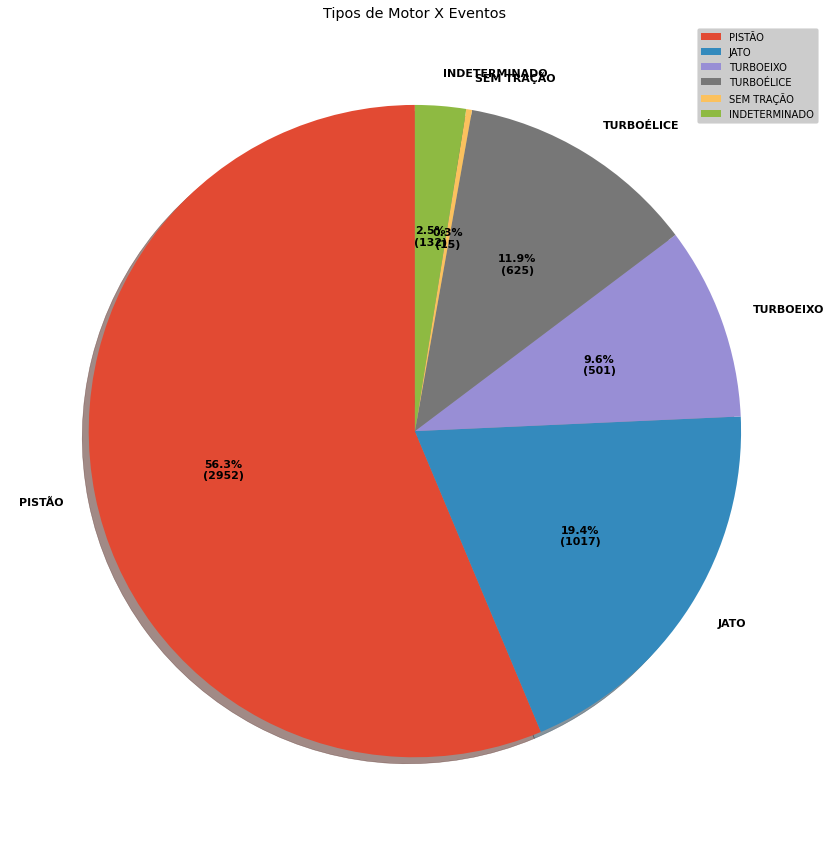

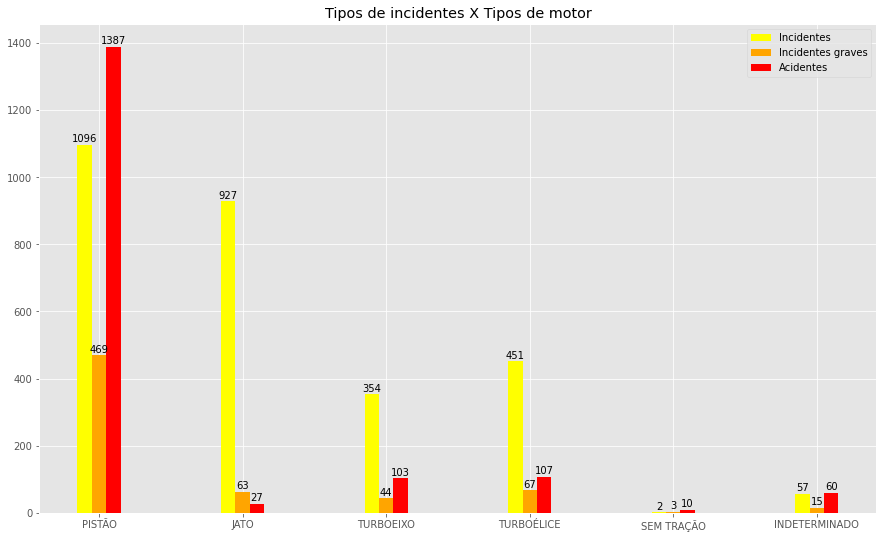

In [ ]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

tipo_motores = df_dados['motor_tipo'].unique()
tipo_incidentes = df_dados['tipo'].unique()

qte_por_motor = [sum(df_dados.loc[(df_dados['motor_tipo']==i)].value_counts()) for i in tipo_motores]
qte_por_inc_motor = [list(sum(df_dados.loc[(df_dados['motor_tipo']==i) & (df_dados['tipo']=='INCIDENTE')].value_counts()) for i in tipo_motores),
                 list(sum(df_dados.loc[(df_dados['motor_tipo']==i) & (df_dados['tipo']=='INCIDENTE GRAVE')].value_counts()) for i in tipo_motores),
                 list(sum(df_dados.loc[(df_dados['motor_tipo']==i) & (df_dados['tipo']=='ACIDENTE')].value_counts()) for i in tipo_motores)]

tamanho_qte_por_inc_motor = [sum(qte_por_inc_motor[0]),sum(qte_por_inc_motor[1]),sum(qte_por_inc_motor[2])]

incid_arange, incidg_arange, acid_arange = np.arange(len(qte_por_inc_motor[0])), np.arange(len(qte_por_inc_motor[1])), np.arange(len(qte_por_inc_motor[2]))

fig2, ax2 = plt.subplots(figsize=(15,15))
fig, ax= plt.subplots(figsize=(15,9))

wedges, texts, autotexts = ax2.pie(qte_por_motor,labels=tipo_motores, autopct=lambda pct: func(pct, qte_por_motor), shadow=True, startangle=90,)
i = ax.bar(incid_arange - 0.1, qte_por_inc_motor[0], 0.1 , label='Incidentes', color='Yellow')
ig = ax.bar(incidg_arange, qte_por_inc_motor[1], 0.1, label='Incidentes graves', color='Orange')
a = ax.bar(acid_arange + 0.1, qte_por_inc_motor[2], 0.1, label='Acidentes', color='Red')

plt.legend(loc='upper left')
plt.title('Motor X Incidentes')
plt.setp(autotexts,**{'color':'black', 'weight':'bold', 'fontsize':11})
plt.setp(texts,**{'color':'black', 'weight':'bold', 'fontsize':11})

ax.set_xticks(np.arange(len(tipo_motores)))
ax.set_xticklabels(tipo_motores)
rects = ax.patches

autolabel(i)
autolabel(ig)
autolabel(a)

ax2.set_title("Tipos de Motor X Eventos")
ax2.legend(loc='best', fontsize=10, frameon=True, facecolor='black', framealpha=0.2)
plt.legend(loc='best')
plt.title( 'Tipos de incidentes X Tipos de motor')
plt.show()

In [ ]:
tipo_motores_df = df_dados[['tipo', 'motor_tipo']]
tipo_df = df_dados[['tipo']]

for i in tipo_motores_df.motor_tipo:
    tipo_df[i] = tipo_motores_df.motor_tipo == i

media_tipodf = tipo_df.groupby('tipo').mean()
std_tipodf = tipo_df.groupby('tipo').std()
corr_tipodf = tipo_df.groupby('tipo').corr()

print(f'\n{media_tipodf}\n')
print(f'\n{std_tipodf}\n')
print(f'\n{corr_tipodf}\n')


                   PISTÃO      JATO  ...  SEM TRAÇÃO  INDETERMINADO
tipo                                 ...                           
ACIDENTE         0.818772  0.015939  ...    0.005903       0.035419
INCIDENTE        0.379633  0.321095  ...    0.000693       0.019744
INCIDENTE GRAVE  0.709531  0.095310  ...    0.004539       0.022693

[3 rows x 6 columns]


                   PISTÃO      JATO  ...  SEM TRAÇÃO  INDETERMINADO
tipo                                 ...                           
ACIDENTE         0.385321  0.125275  ...    0.076628       0.184891
INCIDENTE        0.485380  0.466978  ...    0.026316       0.139142
INCIDENTE GRAVE  0.454323  0.293865  ...    0.067267       0.149035

[3 rows x 6 columns]


                                 PISTÃO      JATO  ...  SEM TRAÇÃO  INDETERMINADO
tipo                                               ...                           
ACIDENTE        PISTÃO         1.000000 -0.270510  ...   -0.163794      -0.407304
                JATO     

## Analise
Os gráficos indicam que que as aeronaves de motor do tipo PISTÃO estão mais propensas a sofrer algum tipo de incidente do que os outros tipos de motor.
O número de acidentes do motor PISTÃO representa 81% de todos os ACIDENTES e 74% de todos os INCIDENTES GRAVES.
Através das informações reunidas, pode-se dizer que o aeronaves que usam PISTÃO estão mais propensos a sofrer ACIDENTES do que os outros tipos.

## Informações referentes a **Quantidade de Motor** das Aeronaves envolvidas nas ocorrências

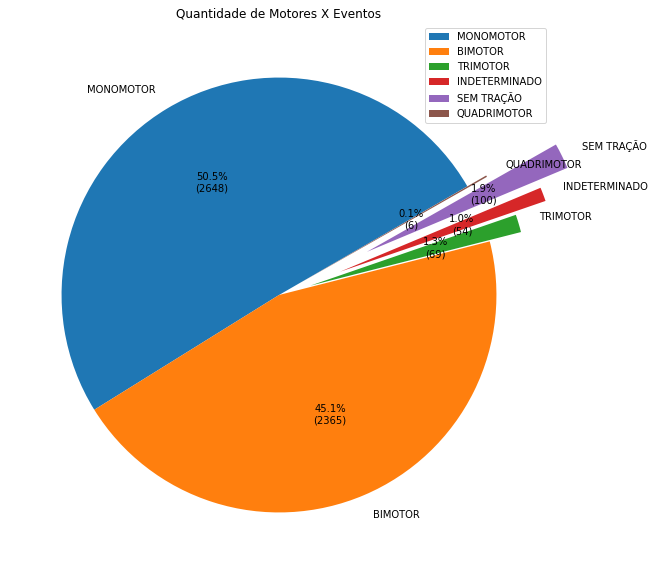

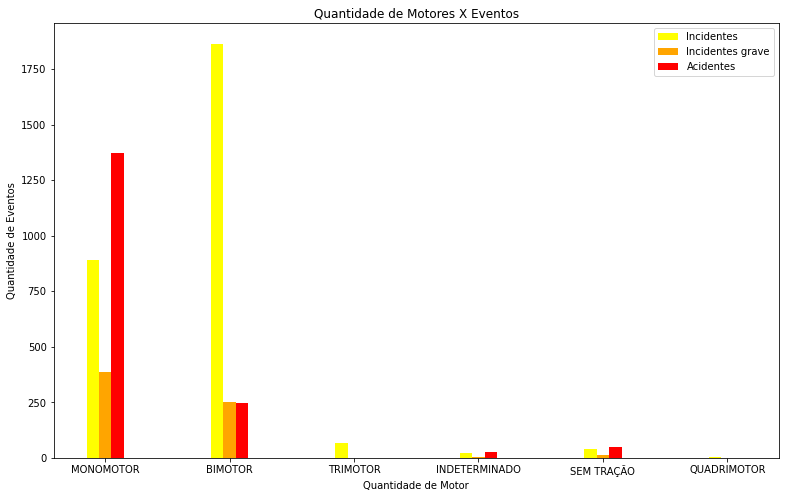

In [ ]:
tipos_motor_quantidade = df_dados['aeronave_motor_quantidade'].unique()

qte_tipos_motor = [sum(df_dados.loc[df_dados['aeronave_motor_quantidade'] == i].value_counts()) for i in tipos_motor_quantidade]

qte_tipos_motor_sep = [list(sum(df_dados.loc[(df_dados['aeronave_motor_quantidade'] == i) & (df_dados['tipo']=='INCIDENTE')].value_counts()) for i in tipos_motor_quantidade),
                       list(sum(df_dados.loc[(df_dados['aeronave_motor_quantidade'] == i) & (df_dados['tipo']=='INCIDENTE GRAVE')].value_counts()) for i in tipos_motor_quantidade),
                       list(sum(df_dados.loc[(df_dados['aeronave_motor_quantidade'] == i) & (df_dados['tipo']=='ACIDENTE')].value_counts()) for i in tipos_motor_quantidade)]

pos_tipos_motor = np.arange(len(qte_tipos_motor))
explode = [0,0,0.15,0.3,0.45,0.1]

qte_motor_df = df_dados[['tipo', 'aeronave_motor_quantidade']]
tipo_df = df_dados[['tipo']]

for i in qte_motor_df.aeronave_motor_quantidade:
    tipo_df[i] = qte_motor_df.aeronave_motor_quantidade == i

fig, ax = plt.subplots(figsize=(15,10))
fig1, ax1 = plt.subplots(figsize=(13,8))

pizza_tipos_motor = ax.pie(qte_tipos_motor, labels=tipos_motor_quantidade, explode=explode, autopct=lambda pct: func(pct, qte_tipos_motor), startangle=30)
bt_inc = ax1.bar(pos_tipos_motor - 0.1, qte_tipos_motor_sep[0], 0.1, label='Incidentes', color='Yellow')
bt_incg = ax1.bar(pos_tipos_motor, qte_tipos_motor_sep[1], 0.1, label='Incidentes grave', color='Orange')
bt_acid = ax1.bar(pos_tipos_motor + 0.1, qte_tipos_motor_sep[2], 0.1, label='Acidentes', color='Red')

ax.set_title('Quantidade de Motores X Eventos')
ax.legend(loc='best')

ax1.set_title('Quantidade de Motores X Eventos')
ax1.legend(tipos_motor_quantidade, loc='best')
ax1.set_xticks(pos_tipos_motor)
ax1.set_xticklabels(tipos_motor_quantidade)
ax1.set_xlabel('Quantidade de Motor')
ax1.set_ylabel('Quantidade de Eventos')

plt.legend()
plt.show()

In [ ]:
quantidade_motor_aeronaves_df = df_dados[['tipo', 'aeronave_motor_quantidade']]
tipo_df = df_dados[['tipo']]

for i in quantidade_motor_aeronaves_df.aeronave_motor_quantidade:
    tipo_df[i] = quantidade_motor_aeronaves_df.aeronave_motor_quantidade == i

media_tipodf = tipo_df.groupby('tipo').mean()
std_tipodf = tipo_df.groupby('tipo').std()
corr_tipodf = tipo_df.groupby('tipo').corr()

print(f'\n{media_tipodf}\n')
print(f'\n{std_tipodf}\n')
print(f'\n{corr_tipodf}\n')


                 MONOMOTOR   BIMOTOR  ...  SEM TRAÇÃO  QUADRIMOTOR
tipo                                  ...                         
ACIDENTE          0.809917  0.146399  ...    0.028335     0.000000
INCIDENTE         0.307932  0.645653  ...    0.013162     0.001732
INCIDENTE GRAVE   0.585477  0.382753  ...    0.021180     0.001513

[3 rows x 6 columns]


                 MONOMOTOR   BIMOTOR  ...  SEM TRAÇÃO  QUADRIMOTOR
tipo                                  ...                         
ACIDENTE          0.392482  0.353610  ...    0.165978     0.000000
INCIDENTE         0.461718  0.478398  ...    0.113990     0.041587
INCIDENTE GRAVE   0.493013  0.486427  ...    0.144093     0.038895

[3 rows x 6 columns]


                               MONOMOTOR   BIMOTOR  ...  SEM TRAÇÃO  QUADRIMOTOR
tipo                                                ...                         
ACIDENTE        MONOMOTOR       1.000000 -0.854852  ...   -0.352497          NaN
                BIMOTOR        -0.8548

## Analise
A maioria dos eventos ocorreram com aeronaves MONOMOTOR e BIMOTOR (cerca de 99%) e, a medida que aumentamos o número de motores, a quantidade de ocorrências diminui, o que sugere maior segurança em aeronaves com mais motores.

## Informações referentes a **Quantidade de Assentos** das Aeronaves envolvidas nas ocorrências

No handles with labels found to put in legend.


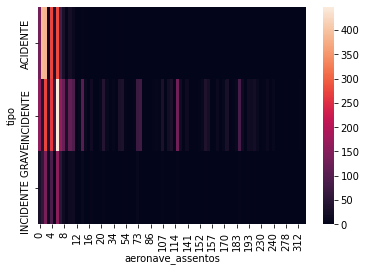

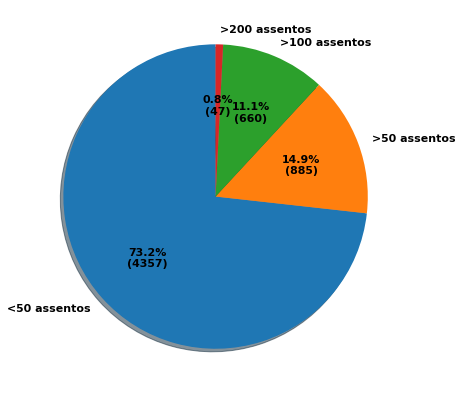

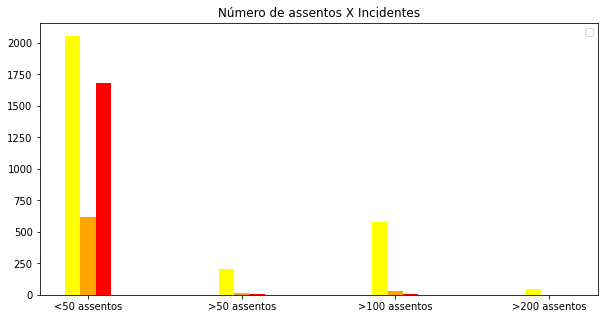

In [ ]:
aero_assentos_tipos = ['<50 assentos', '>50 assentos', '>100 assentos', '>200 assentos']

inc_ = [sum(df_dados.loc[(df_dados['aeronave_assentos'] <= 50) & (df_dados['tipo'] == 'INCIDENTE')].value_counts()),
            sum(df_dados.loc[(df_dados['aeronave_assentos'] > 50) & (df_dados['aeronave_assentos'] <= 100) & (df_dados['tipo'] == 'INCIDENTE')].value_counts()),
            sum(df_dados.loc[(df_dados['aeronave_assentos'] > 100) & (df_dados['aeronave_assentos'] <= 200) & (df_dados['tipo'] == 'INCIDENTE')].value_counts()),
            sum(df_dados.loc[(df_dados['aeronave_assentos'] > 200) & (df_dados['tipo'] == 'INCIDENTE')].value_counts())]

acid_ = [sum(df_dados.loc[(df_dados['aeronave_assentos'] <= 50) & (df_dados['tipo'] == 'ACIDENTE')].value_counts()),
            sum(df_dados.loc[(df_dados['aeronave_assentos'] > 50) & (df_dados['aeronave_assentos'] <= 100) & (df_dados['tipo'] == 'ACIDENTE')].value_counts()),
            sum(df_dados.loc[(df_dados['aeronave_assentos'] > 100) & (df_dados['aeronave_assentos'] <= 200) & (df_dados['tipo'] == 'ACIDENTE')].value_counts()),
            sum(df_dados.loc[(df_dados['aeronave_assentos'] > 200) & (df_dados['tipo'] == 'ACIDENTE')].value_counts())]

incg_ = [sum(df_dados.loc[(df_dados['aeronave_assentos'] <= 50) & (df_dados['tipo'] == 'INCIDENTE GRAVE')].value_counts()),
            sum(df_dados.loc[(df_dados['aeronave_assentos'] > 50) & (df_dados['aeronave_assentos'] <= 100) & (df_dados['tipo'] == 'INCIDENTE GRAVE')].value_counts()),
            sum(df_dados.loc[(df_dados['aeronave_assentos'] > 100) & (df_dados['aeronave_assentos'] <= 200) & (df_dados['tipo'] == 'INCIDENTE GRAVE')].value_counts()),
            sum(df_dados.loc[(df_dados['aeronave_assentos'] > 200) & (df_dados['tipo'] == 'INCIDENTE GRAVE')].value_counts())]

all_ = [sum(df_dados.loc[(df_dados['aeronave_assentos'] <= 50)].value_counts()),
        sum(df_dados.loc[(df_dados['aeronave_assentos'] > 50)].value_counts()),
        sum(df_dados.loc[(df_dados['aeronave_assentos'] > 100)].value_counts()),
        sum(df_dados.loc[(df_dados['aeronave_assentos'] > 200)].value_counts())]

inc_tamanho,acid_tamanho,incg_tamanho = np.arange(len(inc_)), np.arange(len(acid_)), np.arange(len(incg_))

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

aeronave_assentos_tipo = df_dados[['tipo', 'aeronave_assentos']]
aeronave_assentos_tipo.apply(lambda x: x.factorize()[0]).corr()
sn.heatmap(pd.crosstab(aeronave_assentos_tipo.tipo,aeronave_assentos_tipo.aeronave_assentos))

fig, ax = plt.subplots(figsize=(12,7))
fig_n_assentos, ax_n_assentos = plt.subplots(figsize=(10,5))

wedges, texts, autotexts = ax.pie(all_, labels=aero_assentos_tipos, shadow=True, startangle=90, autopct=lambda pct: func(pct, all_))

barra_assentos_inc = ax_n_assentos.bar(inc_tamanho - 0.1,inc_,0.1, color="Yellow")
barra_assentos_incg = ax_n_assentos.bar(inc_tamanho,incg_,0.1, color="Orange")
barra_assentos_acid = ax_n_assentos.bar(inc_tamanho + 0.1,acid_,0.1, color="Red")

ax_n_assentos.set_title("Número de assentos X eventos")
ax_n_assentos.legend(aero_assentos_tipos)
ax_n_assentos.set_xticks(inc_tamanho)
ax_n_assentos.set_xticklabels(aero_assentos_tipos)

plt.title('Número de assentos X Incidentes')
plt.setp(autotexts,**{'color':'black', 'weight':'bold', 'fontsize':11})
plt.setp(texts,**{'color':'black', 'weight':'bold', 'fontsize':11})
plt.legend()
plt.show()

In [ ]:
qte_motor_df = df_dados[['tipo', 'aeronave_assentos']]
tipo_df = df_dados[['tipo']]

for i in qte_motor_df.aeronave_assentos:
    tipo_df[i] = qte_motor_df.aeronave_assentos == i

media_tipodf = tipo_df.groupby('tipo').mean()
std_tipodf = tipo_df.groupby('tipo').std()
corr_tipodf = tipo_df.groupby('tipo').corr()

print(f'\n{media_tipodf}\n')
print(f'\n{std_tipodf}\n')
print(f'\n{corr_tipodf}\n')


                      7         6         2    ...       160       284       70 
tipo                                           ...                              
ACIDENTE         0.048996  0.164699  0.226682  ...  0.000000  0.000000  0.000000
INCIDENTE        0.057153  0.155178  0.094562  ...  0.000346  0.000346  0.000346
INCIDENTE GRAVE  0.075643  0.236006  0.208775  ...  0.000000  0.000000  0.000000

[3 rows x 87 columns]


                      7         6         2    ...       160       284       70 
tipo                                           ...                              
ACIDENTE         0.215924  0.371018  0.418809  ...  0.000000  0.000000  0.000000
INCIDENTE        0.232174  0.362137  0.292659  ...  0.018611  0.018611  0.018611
INCIDENTE GRAVE  0.264626  0.424948  0.406741  ...  0.000000  0.000000  0.000000

[3 rows x 87 columns]


                          7         6         2         9    ...  147  160  284  70 
tipo                                                  

## Analise
Segundo os gráficos, a maior parte das ocorrências aconteceram com aeronaves que possuem **menos de 50 assentos**, especificamente nos intervalos **0 (apenas pilotos) e 6**.
Através dos gráficos, percebe-se que existe uma relação inversa entre o ***número de incidentes, incidentes graves e acidentes*** versos ***número de assentos***, sugerindo que aeronaves de maior porte são mais seguras para viajar.

## Informações Descritivas referentes ao Ano de Fabricação da Aeronave

In [ ]:
# A primeira aeronave nasceu em 1903 e os dados são de até no máximo 2019, então qualquer ano fora disso é considerado inválido
df_copy = df_dados.copy()
df_copy.loc[(df_dados['aeronave_ano_fabricacao'] < 1903) | (df_dados['aeronave_ano_fabricacao'] > 2019),'aeronave_ano_fabricacao'] = np.nan

# removemos valores NaN
df_copy.dropna(inplace=True)

In [ ]:
# Ano de fabricação das aeronaves - Percentual

# Dividimos os dados em 8 períodos
lista_de_valores = [
    df_copy.loc[(df_copy.aeronave_ano_fabricacao >= 1936) & (df_copy.aeronave_ano_fabricacao <= 1952)].value_counts().sum(),
    df_copy.loc[(df_copy.aeronave_ano_fabricacao >= 1953) & (df_copy.aeronave_ano_fabricacao <= 1962)].value_counts().sum(),
    df_copy.loc[(df_copy.aeronave_ano_fabricacao >= 1963) & (df_copy.aeronave_ano_fabricacao <= 1972)].value_counts().sum(),
    df_copy.loc[(df_copy.aeronave_ano_fabricacao >= 1973) & (df_copy.aeronave_ano_fabricacao <= 1982)].value_counts().sum(),
    df_copy.loc[(df_copy.aeronave_ano_fabricacao >= 1983) & (df_copy.aeronave_ano_fabricacao <= 1992)].value_counts().sum(),
    df_copy.loc[(df_copy.aeronave_ano_fabricacao >= 1993) & (df_copy.aeronave_ano_fabricacao <= 2002)].value_counts().sum(),
    df_copy.loc[(df_copy.aeronave_ano_fabricacao >= 2003) & (df_copy.aeronave_ano_fabricacao <= 2012)].value_counts().sum(),
    df_copy.loc[(df_copy.aeronave_ano_fabricacao >= 2013) & (df_copy.aeronave_ano_fabricacao <= 2019)].value_counts().sum(),
]

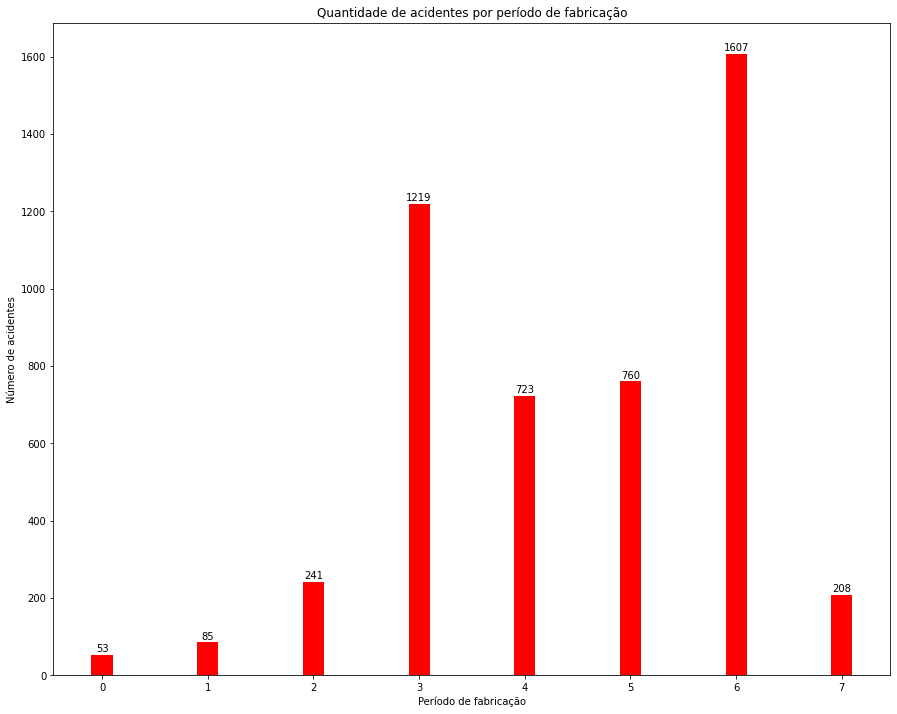

In [ ]:
fig, ax= plt.subplots(figsize=(15,12))
a = ax.bar(np.arange(len(lista_de_valores)), lista_de_valores, 0.2, label='Ano de Fabricação', color='Red',align='center')
plt.ylabel('Número de acidentes')
plt.xlabel('Período de fabricação')


labels = ['1936-1952','1953-1962','1963-1972','1973-1982','1983-1992','1993-2002','2003-2012','2013-2019']
ax.set_xticks(np.arange(len(lista_de_valores)))

autolabel(a)

plt.title('Quantidade de acidentes por período de fabricação')
plt.show()

In [ ]:
def getAcidentesPorIntervalo(periodo,tipo):
    return df_copy.loc[(df_copy.aeronave_ano_fabricacao >= periodo[0]) & (df_copy.aeronave_ano_fabricacao <= periodo[1]) & (df_copy.tipo==tipo)].value_counts().sum()

periodos = [(1936,1952),(1953,1962),(1963,1972),(1973,1982),(1983,1992),(1993,2002),(2003,2012),(2013,2019)]


lista_de_valores = [
                    [getAcidentesPorIntervalo(periodo,'ACIDENTE') for periodo in periodos],
                    [getAcidentesPorIntervalo(periodo,'INCIDENTE') for periodo in periodos],
                    [getAcidentesPorIntervalo(periodo,'INCIDENTE GRAVE') for periodo in periodos]
]

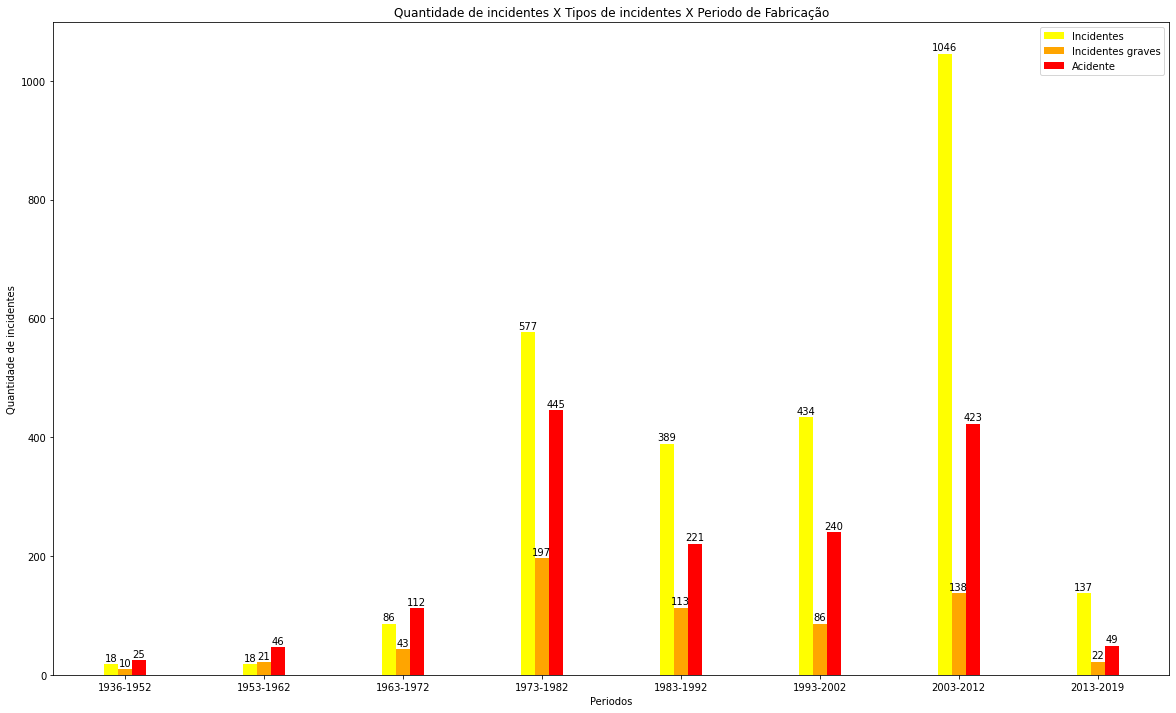

In [ ]:
x_pos = np.arange(len(lista_de_valores[0]))

fig, ax = plt.subplots(figsize=(20,12))

container_inc = ax.bar(x_pos - 0.1, lista_de_valores[1], 0.1, label='Incidentes', color='Yellow')
container_incg = ax.bar(x_pos, lista_de_valores[2], 0.1, label='Incidentes graves', color='Orange')
container_acid = ax.bar(x_pos + 0.1, lista_de_valores[0], 0.1, label='Acidente', color='Red')

labels = ['1936-1952','1953-1962','1963-1972','1973-1982','1983-1992','1993-2002','2003-2012','2013-2019']


ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Quantidade de incidentes X Tipos de incidentes X Periodo de Fabricação')
ax.set_xlabel('Periodos')
ax.set_ylabel('Quantidade de incidentes')
'''
ax.bar_label(container_inc, **{'padding':5}, fontsize=12, color='Black')
ax.bar_label(container_incg, **{'padding':5}, fontsize=12, color='Orange')
ax.bar_label(container_acid, **{'padding':5}, fontsize=12, color='Red')
'''
autolabel(container_inc)
autolabel(container_incg)
autolabel(container_acid)

plt.legend()
plt.show()

## Informações Estatísticas referentes ao Ano de Fabricação

In [ ]:
df_copy['aeronave_ano_fabricacao'].describe()

count    4896.000000
mean     1992.959355
std        15.443600
min      1936.000000
25%      1980.000000
50%      1994.000000
75%      2008.000000
max      2019.000000
Name: aeronave_ano_fabricacao, dtype: float64

## Analise
Nos dados acima, é visível que as aeronaves produzidas durante a década de 2000 representam a majorietariedade sendo responsáveis por 1607(30.65%) de 5242 acidentes aéreos. Porém, as aeronaves da década de 2010 responsabilizam-se apenas por 208(3.96%), comparável com o período de 1963-1972 que representa apenas 4.59%(241).

## Informações Descritivas referentes aos Países Fabricantes das Aeronaves

In [ ]:
# Descrição da Series
df_dados['aeronave_pais_fabricante'].describe()

count       5242
unique        20
top       BRASIL
freq        5139
Name: aeronave_pais_fabricante, dtype: object

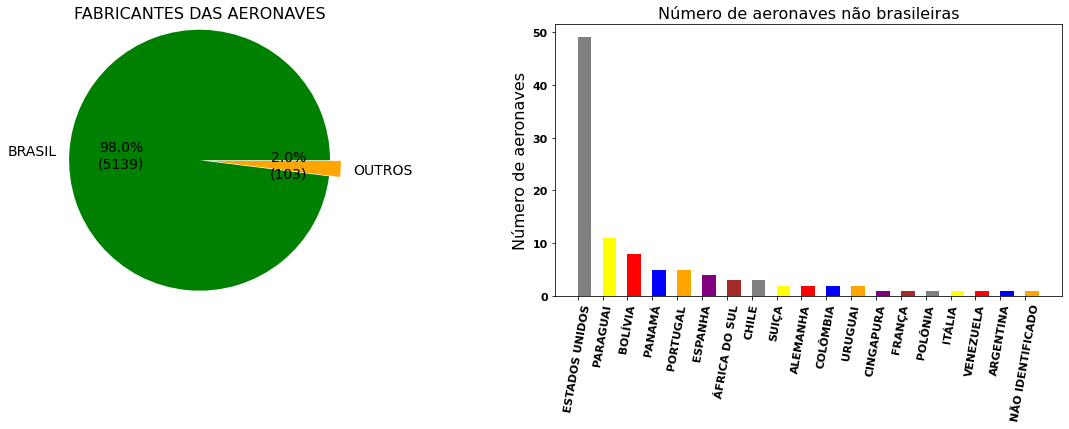

In [ ]:
# Fabricantes das aeronaves - Percentual
x = df_dados['aeronave_pais_fabricante'].unique()
y = df_dados['aeronave_pais_fabricante'].value_counts()

labels = ['BRASIL','OUTROS']
fracs = [y['BRASIL']]
valor_outros = 0

for index,value in y.iteritems():
    if index == 'BRASIL':
        continue
    valor_outros += value

fracs.append(valor_outros)


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))


# Função para adicionar o elemento absoluto junto a porcentagem no gráfico de pizza
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)
explode = (0,0.1)

wedges, texts, autotexts = ax1.pie(fracs, explode=explode, labels=labels, autopct=lambda pct: func(pct, y.values),radius=1.2,colors=('green','orange'))

styling = {'color':'black','weight':'ultralight','fontsize':14}

plt.setp(autotexts,**styling)
plt.setp(texts,**styling)
ax1.set_title("FABRICANTES DAS AERONAVES",**{'fontsize':16})


# Fabricantes das aeronaves não brasileiras - Valores absolutos

# Deletar o elemento 'BRASIL' do x e y
x1 = np.delete(x,0)
y1 = y.drop('BRASIL')

x_pos = [i for i, _ in enumerate(x1)]

p1 = ax2.bar(x_pos,y1,width=0.55,color=('grey','yellow','red','blue','orange','purple','brown'),align='edge')

ax2.set_ylabel('Número de aeronaves',**{'fontsize':16})
ax2.set_title('Número de aeronaves não brasileiras',**{'fontsize':16})
ax2.set_xticks(x_pos)
styling_x = {'color':'black','weight':'bold','fontsize':11}
ax2.set_xticklabels(x1,rotation=80,fontdict=styling_x)

# Setar as propriedades das labels do eixo y
for label in ax2.get_yticklabels():
    label.set_fontsize(styling_x['fontsize'])
    label.set_weight(styling_x['weight'])


plt.show()

## Informações Estatísticas referentes aos Países Fabricantes das Aeronaves
* Separados por tipos de ocorrência

In [ ]:
df_paisFabOcorr = df_dados[['tipo', 'aeronave_pais_fabricante']]
df_aeroTipo = df_dados[['tipo']]

for i in df_paisFabOcorr.aeronave_pais_fabricante:
    df_aeroTipo[i] = df_paisFabOcorr.aeronave_pais_fabricante == i

In [ ]:
# Média
df_aeroTipo.groupby('tipo').mean()

,BRASIL,ESTADOS UNIDOS,PARAGUAI,BOLÍVIA,PANAMÁ,PORTUGAL,ESPANHA,ÁFRICA DO SUL,CHILE,SUIÇA,ALEMANHA,COLÔMBIA,URUGUAI,CINGAPURA,FRANÇA,POLÔNIA,ITÁLIA,VENEZUELA,ARGENTINA,NÃO IDENTIFICADO
tipo,,,,,,,,,,,,,,,,,,,,
ACIDENTE,0.985832,0.006494,0.004132,0.001181,0.000000,0.000000,0.000590,0.000000,0.000000,0.000000,0.000000,0.000000,0.00059,0.000000,0.000000,0.00059,0.000000,0.000000,0.000000,0.000590
INCIDENTE,0.974368,0.012816,0.000346,0.000693,0.000693,0.001386,0.000693,0.000000,0.001732,0.000346,0.001039,0.000693,0.00000,0.000346,0.000693,0.00000,0.000346,0.000346,0.000693,0.002771
INCIDENTE GRAVE,0.992436,0.001513,0.000000,0.000000,0.000000,0.001513,0.000000,0.001513,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.003026


In [ ]:
# Desvio Padrão
df_aeroTipo.groupby('tipo').std()

,BRASIL,ESTADOS UNIDOS,PARAGUAI,BOLÍVIA,PANAMÁ,PORTUGAL,ESPANHA,ÁFRICA DO SUL,CHILE,SUIÇA,ALEMANHA,COLÔMBIA,URUGUAI,CINGAPURA,FRANÇA,POLÔNIA,ITÁLIA,VENEZUELA,ARGENTINA,NÃO IDENTIFICADO
tipo,,,,,,,,,,,,,,,,,,,,
ACIDENTE,0.118217,0.080344,0.064168,0.034350,0.000000,0.000000,0.024296,0.000000,0.000000,0.000000,0.000000,0.000000,0.024296,0.000000,0.000000,0.024296,0.000000,0.000000,0.000000,0.024296
INCIDENTE,0.158063,0.112500,0.018611,0.026316,0.026316,0.037203,0.026316,0.000000,0.041587,0.018611,0.032225,0.026316,0.000000,0.018611,0.026316,0.000000,0.018611,0.018611,0.026316,0.052577
INCIDENTE GRAVE,0.086709,0.038895,0.000000,0.000000,0.000000,0.038895,0.000000,0.038895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054965


In [ ]:
# Correlação
df_aeroTipo.corr()

,BRASIL,ESTADOS UNIDOS,PARAGUAI,BOLÍVIA,PANAMÁ,PORTUGAL,ESPANHA,ÁFRICA DO SUL,CHILE,SUIÇA,ALEMANHA,COLÔMBIA,URUGUAI,CINGAPURA,FRANÇA,POLÔNIA,ITÁLIA,VENEZUELA,ARGENTINA,NÃO IDENTIFICADO
BRASIL,1.000000,-0.686135,-0.276152,-0.195195,-0.137997,-0.218255,-0.169027,-0.097569,-0.218255,-0.097569,-0.169027,-0.137997,-0.097569,-0.097569,-0.137997,-0.097569,-0.097569,-0.097569,-0.137997,-0.323910
ESTADOS UNIDOS,-0.686135,1.000000,-0.003798,-0.002684,-0.001898,-0.003001,-0.002324,-0.001342,-0.003001,-0.001342,-0.002324,-0.001898,-0.001342,-0.001342,-0.001898,-0.001342,-0.001342,-0.001342,-0.001898,-0.004454
PARAGUAI,-0.276152,-0.003798,1.000000,-0.001080,-0.000764,-0.001208,-0.000936,-0.000540,-0.001208,-0.000540,-0.000936,-0.000764,-0.000540,-0.000540,-0.000764,-0.000540,-0.000540,-0.000540,-0.000764,-0.001793
BOLÍVIA,-0.195195,-0.002684,-0.001080,1.000000,-0.000540,-0.000854,-0.000661,-0.000382,-0.000854,-0.000382,-0.000661,-0.000540,-0.000382,-0.000382,-0.000540,-0.000382,-0.000382,-0.000382,-0.000540,-0.001267
PANAMÁ,-0.137997,-0.001898,-0.000764,-0.000540,1.000000,-0.000604,-0.000468,-0.000270,-0.000604,-0.000270,-0.000468,-0.000382,-0.000270,-0.000270,-0.000382,-0.000270,-0.000270,-0.000270,-0.000382,-0.000896
PORTUGAL,-0.218255,-0.003001,-0.001208,-0.000854,-0.000604,1.000000,-0.000739,-0.000427,-0.000955,-0.000427,-0.000739,-0.000604,-0.000427,-0.000427,-0.000604,-0.000427,-0.000427,-0.000427,-0.000604,-0.001417
ESPANHA,-0.169027,-0.002324,-0.000936,-0.000661,-0.000468,-0.000739,1.000000,-0.000331,-0.000739,-0.000331,-0.000573,-0.000468,-0.000331,-0.000331,-0.000468,-0.000331,-0.000331,-0.000331,-0.000468,-0.001097
ÁFRICA DO SUL,-0.097569,-0.001342,-0.000540,-0.000382,-0.000270,-0.000427,-0.000331,1.000000,-0.000427,-0.000191,-0.000331,-0.000270,-0.000191,-0.000191,-0.000270,-0.000191,-0.000191,-0.000191,-0.000270,-0.000633
CHILE,-0.218255,-0.003001,-0.001208,-0.000854,-0.000604,-0.000955,-0.000739,-0.000427,1.000000,-0.000427,-0.000739,-0.000604,-0.000427,-0.000427,-0.000604,-0.000427,-0.000427,-0.000427,-0.000604,-0.001417
SUIÇA,-0.097569,-0.001342,-0.000540,-0.000382,-0.000270,-0.000427,-0.000331,-0.000191,-0.000427,1.000000,-0.000331,-0.000270,-0.000191,-0.000191,-0.000270,-0.000191,-0.000191,-0.000191,-0.000270,-0.000633


##Análise
No gráfico acima é evidente que, dentre os acidentes de 2010 à 2019, dentre os países fabricantes das aeronaves envolvidas nas ocorrências, o Brasil domina o ranking, representando 98% dos casos, enquanto apenas 2% pertence a outros países.

# Ocorrências por **Status Ocorrências**

## Informações referentes a Liberação das Aeronaves
* Realizado uma contagem dos valores da permissão das aeronaves que sofreram as ocorrências
* Foi feito uma agregação dos valores por estado de permissão das aeronaves 

In [ ]:
Sim = df_dados.loc[(df_dados.aeronave_liberada == 'SIM')].value_counts()
Nao = df_dados.loc[(df_dados.aeronave_liberada == 'NÃO')].value_counts()
Indeterminada = df_dados.loc[(df_dados.aeronave_liberada == 'INDETERMINADO')].value_counts()
Sim = Sim.sum()
Nao = Nao.sum()
Indeterminada = Indeterminada.sum()
print('Sim: {}  |  Nao: {}  |  Indeterminada: {}' .format(Sim, Nao, Indeterminada))

Sim: 2687  |  Nao: 136  |  Indeterminada: 2419


Com soma e contagens feitas na celula anterior foi colocado em um grafico de pizza utilizando a Biblioteca matplot com os numeros das permissões das aeronaves

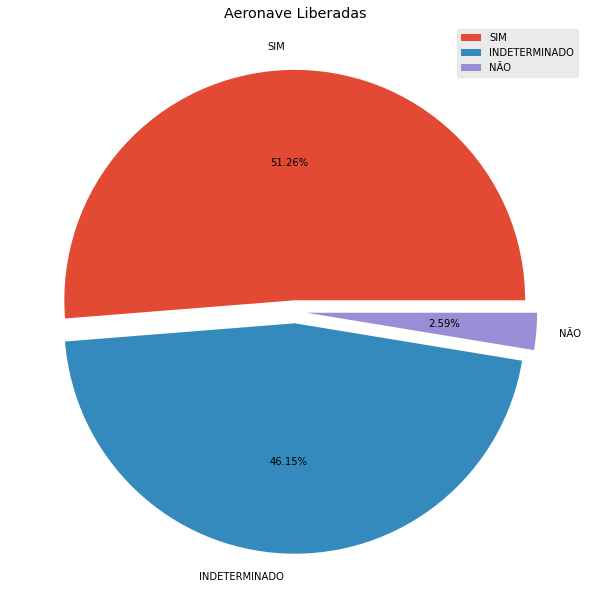

In [ ]:
plt.style.use("ggplot")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

labels = 'SIM', 'INDETERMINADO', 'NÃO'
fracs = df_dados['aeronave_liberada'].value_counts()

explode = (0.05, 0.05, 0.05)

pies = ax.pie(fracs, explode=explode, labels=labels, autopct='%1.2f%%')

ax.set_title("Aeronave Liberadas")
ax.legend()

## Analise
Podemos Analisar que o gráfico em pizza mostra que apenas 51.26% das aeronaves foram liberadas para voo, 46.15% não foi informado se a aeronave foi liberada ou não e 2.59% das aeronaves que sofreram acidentes não foram liberadas

## Informações referentes as Aeronaves Envolvidas
Igualmente como no grafico anterior foi feito uma contagem dos valores e uma agregação para as variáveis com a quantidade de aeronaves envolvidas nas ocorrências.

In [ ]:
uma = df_dados.loc[(df_dados.aeronaves_envolvidas == 1)].value_counts()
duas = df_dados.loc[(df_dados.aeronaves_envolvidas == 2)].value_counts()
tres = df_dados.loc[(df_dados.aeronaves_envolvidas == 3)].value_counts()
uma = uma.sum()
duas = duas.sum()
tres = tres.sum()
print('Uma Aeronave: {}  |  Duas Aeronaves: {}  |  Três Aeronaves: {}' .format(uma, duas, tres))

Uma Aeronave: 5182  |  Duas Aeronaves: 58  |  Três Aeronaves: 2


* Foi feito um grafico de barras utilizando o MAtplot com a quantidade de aeronaves envolvidas nas ocorrências.
* Foi utilizado o estilo para o grafico ggplot.

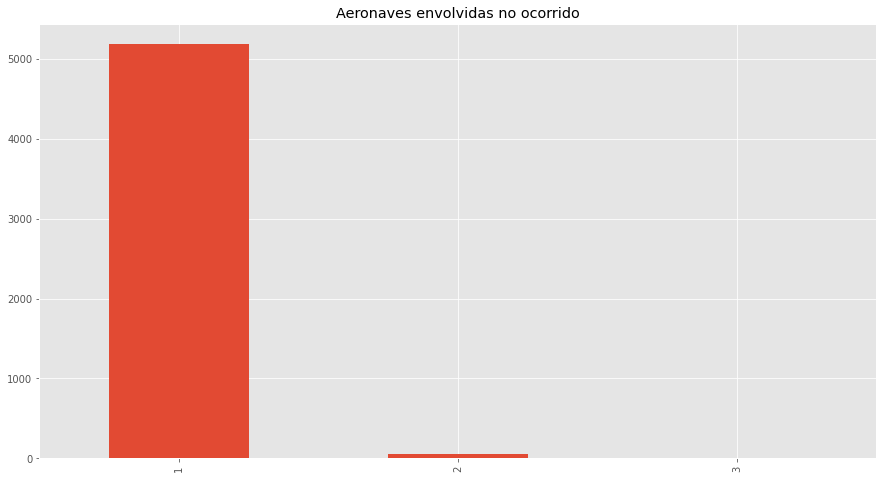

In [ ]:
plt.style.use("ggplot")
QTD_aero_ACi = df_dados['aeronaves_envolvidas'].value_counts().plot(kind='bar',
                                                         subplots=True,
                                                         label='Aeronaves envolvidas no ocorrido',
                                                         figsize=(15,8))


## Analise
Podemos analisar que mais de 95% das aeronaves nos ocorridos sofreram danos de forma individual.

## Informações referentes as Ocorrências de Saída de Pista

In [ ]:
SaindodaPista = df_dados['ocorrencia_saida_pista'].str.contains('SIM').sum()
NaoSaindoPista = df_dados['ocorrencia_saida_pista'].str.contains('NÃO').sum()
print(SaindodaPista,NaoSaindoPista)

458 4784


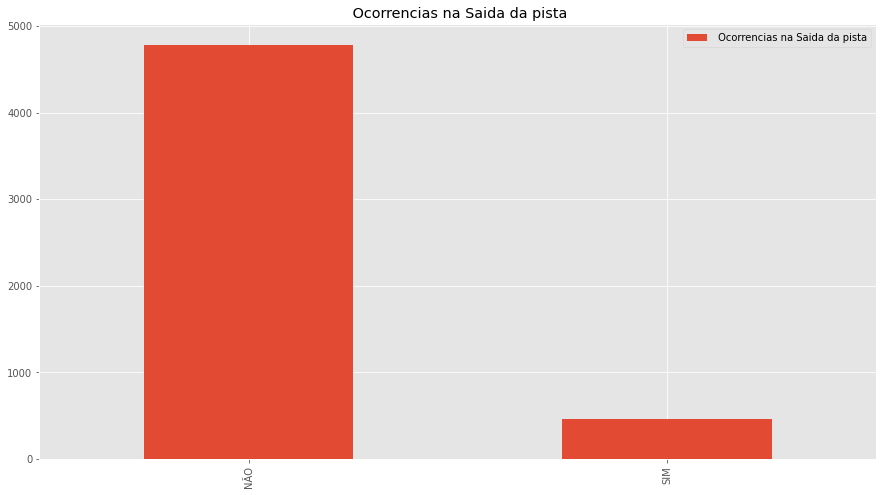

In [ ]:
var = df_dados['ocorrencia_saida_pista'].value_counts().plot(kind='bar',
                                                         subplots=True,
                                                         label=' Ocorrencias na Saida da pista',
                                                         figsize=(15,8))
plt.legend()

## Analise
Podemos ver no gráfico que 91.26% dos casos não estão relacionados a saída de pista.

## Informações referentes as Fases de Operação
Foi feito um gráfico de barras utilizando o matplot mostrando qual fase de operação estava a aeronaves no momento do ocorrido.

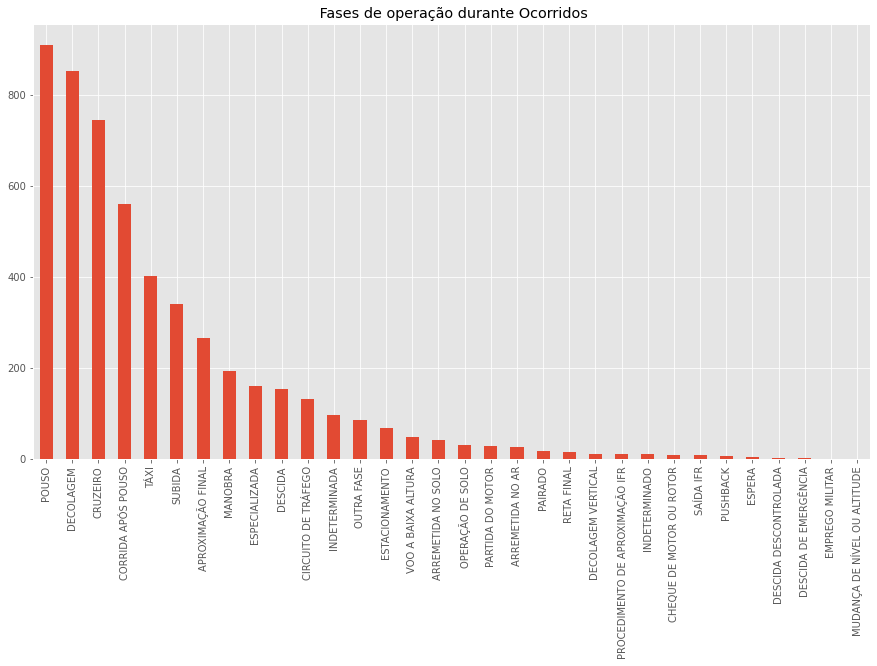

In [ ]:
plt.style.use("ggplot")
var = df_dados['aeronave_fase_operacao'].value_counts().plot(kind='bar',
                                                         subplots=True,
                                                         label=' Fases de operação durante Ocorridos',
                                                         figsize=(15,8))



## Analise
Podemos analisar que no gráfico mostra que a maioria dos Ocorridos estão próximos ao pouso ou decolagem das aeronaves.

# Ocorrências por **Status Pós Ocorrências**

## Informações Descritivas referentes aos Níveis de Dano das Aeronaves

In [ ]:
# Descrição da Series
df_dados['aeronave_nivel_dano'].describe()

count       5242
unique         5
top       NENHUM
freq        1827
Name: aeronave_nivel_dano, dtype: object

In [ ]:
## Fazendo a contagem de todos os níveis de dano e guardando em uma lista
lista_de_valores = [
    df_dados.loc[df_dados.aeronave_nivel_dano=='NENHUM'].value_counts().sum(),
    df_dados.loc[df_dados.aeronave_nivel_dano=='LEVE'].value_counts().sum(),
    df_dados.loc[df_dados.aeronave_nivel_dano=='SUBSTANCIAL'].value_counts().sum(),
    df_dados.loc[df_dados.aeronave_nivel_dano=='DESTRUÍDA'].value_counts().sum(),
    df_dados.loc[df_dados.aeronave_nivel_dano=='INDETERMINADO'].value_counts().sum(),
]
print(f'NENHUM: {lista_de_valores[0]}  |  LEVE: {lista_de_valores[1]}  |  SUBSTANCIAL: {lista_de_valores[2]}  |  DESTRUIDA: {lista_de_valores[3]}  |  INDETERMINADO: {lista_de_valores[4]}')

NENHUM: 1827  |  LEVE: 1529  |  SUBSTANCIAL: 1515  |  DESTRUIDA: 329  |  INDETERMINADO: 42


Text(0.5, 1.0, 'NÍVEL DE DANO')

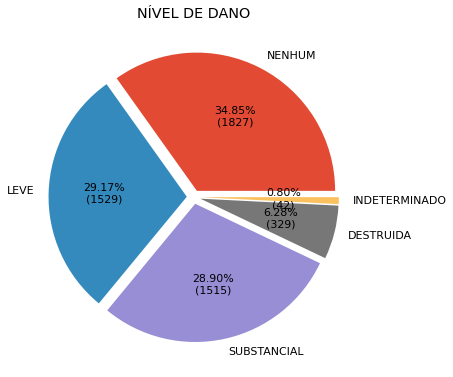

In [ ]:
# Nível de dano - Percentual
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.2f}%\n({:d})".format(pct, absolute)

labels = 'NENHUM', 'LEVE', 'SUBSTANCIAL', 'DESTRUIDA', 'INDETERMINADO'

explode = (0.05, 0.05, 0.05, 0.05, 0.05)


wedges, texts, autotexts = ax.pie(lista_de_valores, explode=explode, labels=labels, autopct=lambda pct: func(pct, lista_de_valores))

style_texts = {'color':'black','weight':'ultralight','fontsize':11}
plt.setp(texts,**style_texts)
plt.setp(autotexts,**style_texts)

ax.set_title("NÍVEL DE DANO")

### Tabela_01 - Nível de Dano x Número de Assentos

In [ ]:
# Níveis de dano das aeronaves por número de assentos
## Criando um DataFrame com as Variáveis "aeronave_assentos" e "aeronave_nivel_dano"
df_AssenDano = df_dados[['aeronave_assentos', 'aeronave_nivel_dano']]

In [ ]:
# Separando o número de assentos por grupos
grupo_assentos = {
    '0-50' : lambda s: s<=50,
    '51-100' : lambda s: (s>50 & s<= 100),
    '101-200' : lambda s: (s>100 & s<= 200),
    '200+' : lambda s: s>200
}

df_danoAssen = df_dados[['aeronave_nivel_dano']]

In [ ]:
# Fazendo a contagem de cada nível de dano para cada grupo de assentos
for grupo in grupo_assentos:
    series = df_AssenDano.aeronave_assentos.copy()
    for index, value in series.items():
        series[index] = grupo_assentos[grupo](value)
    df_danoAssen[grupo] = series

df_danoAssen.groupby('aeronave_nivel_dano').sum()

,0-50,51-100,101-200,200+
aeronave_nivel_dano,,,,
DESTRUÍDA,329,232,238,0
INDETERMINADO,38,29,28,0
LEVE,1228,1249,1286,21
NENHUM,1267,1491,1570,25
SUBSTANCIAL,1495,1081,1176,1


## Informações Estatísticas referentes aos Níveis de Danos das Aeronaves

In [ ]:
df_danoOcorr = df_dados[['tipo', 'aeronave_nivel_dano']]
df_aeroTipo = df_dados[['tipo']]

for i in df_danoOcorr.aeronave_nivel_dano:
    df_aeroTipo[i] = df_danoOcorr.aeronave_nivel_dano == i

In [ ]:
# Média
df_aeroTipo.groupby('tipo').mean()

,LEVE,SUBSTANCIAL,DESTRUÍDA,NENHUM,INDETERMINADO
tipo,,,,,
ACIDENTE,0.032468,0.744392,0.194215,0.014758,0.014168
INCIDENTE,0.406651,0.021129,0.000000,0.568064,0.004157
INCIDENTE GRAVE,0.453858,0.291982,0.000000,0.245083,0.009077


In [ ]:
# Desvio Padrão
df_aeroTipo.groupby('tipo').std()

,LEVE,SUBSTANCIAL,DESTRUÍDA,NENHUM,INDETERMINADO
tipo,,,,,
ACIDENTE,0.177291,0.436331,0.395712,0.120618,0.118217
INCIDENTE,0.491294,0.143840,0.000000,0.495431,0.064348
INCIDENTE GRAVE,0.498243,0.455018,0.000000,0.430462,0.094913


In [ ]:
# Correlação
df_aeroTipo.corr()

,LEVE,SUBSTANCIAL,DESTRUÍDA,NENHUM,INDETERMINADO
LEVE,1.000000,-0.409136,-0.166060,-0.469370,-0.057672
SUBSTANCIAL,-0.409136,1.000000,-0.164988,-0.466338,-0.057299
DESTRUÍDA,-0.166060,-0.164988,1.000000,-0.189277,-0.023257
NENHUM,-0.469370,-0.466338,-0.189277,1.000000,-0.065735
INDETERMINADO,-0.057672,-0.057299,-0.023257,-0.065735,1.000000


## Analise
De acordo com o gráfico, percebemos que, dentre os níveis de danos, os mais comuns são: Nenhum(34.85%), Substancial(28.90%) e Leve(29.17%). Com a Tabela_01, é possível observar que o número de assentos não influencia no nível de dano causado pelo acidente. 

## Informações referentes aos Status de Investigação

In [ ]:
# Descrição da Series
df_dados['status_investigacao'].describe()

count           5242
unique             3
top       FINALIZADA
freq            4066
Name: status_investigacao, dtype: object

In [ ]:
## Fazendo a contagem de todos os status["ATIVA", "FINALIZADA" e "Indeterminada"] das investigações e guardando em variáveis

statusinv_ativa = df_dados.loc[df_dados.status_investigacao=='ATIVA'].value_counts().sum()
statusinv_finalizada = df_dados.loc[df_dados.status_investigacao=='FINALIZADA'].value_counts().sum()
statusinv_indeterminada = df_dados.loc[df_dados.status_investigacao=='INDETERMINADA'].value_counts().sum()

print(f'ATIVA: {statusinv_ativa}  |  FINALIZADA: {statusinv_finalizada}  |  INDETERMINADA: {statusinv_indeterminada}')

ATIVA: 816  |  FINALIZADA: 4066  |  INDETERMINADA: 360


In [ ]:
# Ocultando alertas
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Status das investigações por ano
## Criando um DataFrame com as Variáveis "ano" e "status_investigacao"
df_AnoStatus = df_dados[['ano', 'status_investigacao']]

df_mediaAno = df_dados[['status_investigacao']]


In [ ]:
# Distribuindo a quantidade e os status das investigações por ano
for i in ano:
    df_mediaAno[str(i)] = df_AnoStatus.ano == i

df_mediaAno.groupby('status_investigacao').sum()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
status_investigacao,,,,,,,,,,
ATIVA,28,91,40,53,59,49,119,104,139,134
FINALIZADA,469,453,584,563,470,373,247,297,254,356
INDETERMINADA,55,32,23,37,38,49,37,33,50,6


In [ ]:
# Media de status das investigações por ano
df_mediaAno.groupby('status_investigacao').mean()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
status_investigacao,,,,,,,,,,
ATIVA,0.034314,0.111520,0.049020,0.064951,0.072304,0.060049,0.145833,0.127451,0.170343,0.164216
FINALIZADA,0.115347,0.111412,0.143630,0.138465,0.115593,0.091736,0.060748,0.073045,0.062469,0.087555
INDETERMINADA,0.152778,0.088889,0.063889,0.102778,0.105556,0.136111,0.102778,0.091667,0.138889,0.016667


In [ ]:
# Desvio padrão dos status das investigações por ano
df_mediaAno.groupby('status_investigacao').std()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
status_investigacao,,,,,,,,,,
ATIVA,0.182145,0.314968,0.216041,0.246590,0.259149,0.237723,0.353156,0.333682,0.376165,0.370698
FINALIZADA,0.319479,0.314680,0.350757,0.345430,0.319775,0.288689,0.238896,0.260242,0.242036,0.282682
INDETERMINADA,0.360274,0.284979,0.244895,0.304091,0.307696,0.343384,0.304091,0.288956,0.346312,0.128197


Text(0.5, 1.0, 'STATUS DAS INVESTIGACOES')

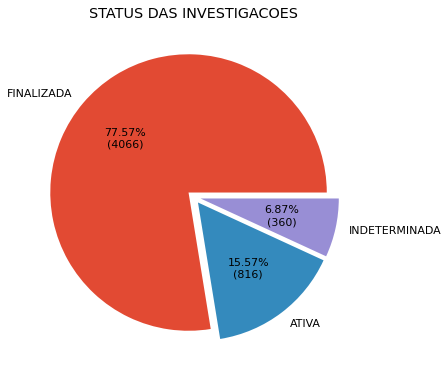

In [ ]:
# Status das Investigações - Percentual
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
all_values = [statusinv_ativa,statusinv_finalizada,statusinv_indeterminada]

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.2f}%\n({:d})".format(pct, absolute)

labels = 'FINALIZADA', 'ATIVA', 'INDETERMINADA'
fracs = df_dados['status_investigacao'].value_counts()

explode = (0.05, 0.05, 0.05)


wedges, texts, autotexts = ax.pie(fracs, explode=explode, labels=labels, autopct=lambda pct: func(pct, all_values))

style_texts = {'color':'black','weight':'ultralight','fontsize':11}
plt.setp(texts,**style_texts)
plt.setp(autotexts,**style_texts)

ax.set_title("STATUS DAS INVESTIGACOES")

## Analise
Ao analisarmos os dados adquiridos, percebemos que 4066(77.57%) das investigações já foram finalizadas. Porém, 816(15.57%) delas ainda estão em andamento, sendo que 119(14.58%) pertencem aos anos de 2010 e 2011. Além disso, é observável que, nas investigações ativas, existe uma divergência dos dados. Com isso, é possível concluir que o passar dos anos não necessariamente indica uma maior taxa de conclusão das investigações.